# <u>TIME SERIES BASED RISK ANALYSIS APP FOR CRYPTOCURRENCY TRADING</u>

|  | GROUP 5 MEMBERS | GITHUB | 
| --- | --- | --- |
| 1. | MATTHEWS TREVOR | https://github.com/Vetre23 |
| 2. | STEPHEN WAWERU | https://github.com/stendewa|
| 3. | CAROL MUNDIA | https://github.com/WairimuMundia |
| 4. | LILIAN MULI | https://github.com/mwikali24 |
| 5. | PETER MAINA | https://github.com/Mr-PeterMaina |



> ### **PROJECT OVERVIEW**
* As the cryptocurrency market grows, investors face increasing challenges in making informed trading decisions. 
* Our proposed application, CryptoRisk Analyzer, aims to provide a comprehensive risk analysis tool for the top trading cryptocurrencies. 
* By leveraging time series forecasting and machine learning metrics, this app will help users compare cryptocurrencies and assess their potential risks before making investment decisions.

> ### **KEY OBJECTIVES**
1. Time Series Analysis: Utilize historical price data for top cryptocurrencies (e.g., Bitcoin, Ethereum, Cardano) to identify trends, seasonality, and volatility. This will form the basis for forecasting future prices.
2. Machine Learning Integration: Implement machine learning models, such as ARIMA, LSTM, and regression analysis, to predict future price movements. Metrics such as Mean Squared Error (MSE) will measure the accuracy of these predictions, allowing users to gauge the reliability of forecasts.
3. Risk Assessment Metrics: Calculate risk factors based on volatility, drawdowns, and historical performance. Provide users with an intuitive risk score for each cryptocurrency, helping them to evaluate their risk tolerance.
4. Cryptocurrency Comparison: Users can select two cryptocurrencies for side-by-side comparison. The app will generate a comprehensive report detailing the predicted price movements, risk assessments, and machine learning accuracy metrics (e.g. MSE).
5. User-Friendly Interface: A web-based application with an intuitive UI will allow users to easily navigate through different cryptocurrencies, access analysis reports, and visualize historical trends through interactive graphs and charts.

> ### **PROJECT BENEFITS**
* Informed Decision-Making: Equip investors with the necessary tools and insights to make well-informed trading decisions, potentially leading to higher returns.
* Real-Time Updates: Continuous data analysis and updates ensure users receive the most current insights based on market fluctuations.
* Risk Management: Help users understand and mitigate risks associated with cryptocurrency investments, enhancing their overall investment strategy.

> ### **TARGET AUDIENCE**
1. Individual investors looking to optimize their cryptocurrency portfolios.
2. Financial advisors and analysts seeking reliable tools for crypto asset evaluation.
3. Educational platforms aiming to teach risk analysis and investment strategies in the cryptocurrency space.

> ### **DATA SOURCE**
* We scraped the data from [CoinGecko](https://www.coingecko.com/en/all-cryptocurrencies).  
* Cryptocurrency that we wanted to focus on were cardano, bitcoin, ethereum, tether, dogecoin, binancecoin, ripple.

> ### **PROJECT METHODOLOGY**
The project will use the CRISP-DM that is Cross-Industry Standard Process for Data Mining methodology, which has several stages:
   
  * Business understanding   
  * Data Understanding  
  * Data preparation  
  * Modeling  
  * Evaluation  
  * Deployment  


In [1]:
# Import libraries to extract data from CoinGecko

from pycoingecko import CoinGeckoAPI
import pandas as pd
import datetime
import warnings            
warnings.filterwarnings("ignore")

#Initialize the CoinGecko API
cg = CoinGeckoAPI()

#Generate date range from January 1, 2024 to October 22 2024
start_date = int(datetime.datetime(2024,1,1).timestamp())
end_date = int(datetime.datetime(2024,10,22).timestamp())

#fetch historical data for three coins
coins = ['cardano', 'bitcoin', 'ethereum','tether', 'dogecoin', 'binancecoin','ripple']

#create an empty dictionary to store the data for each coin
coin_data = {}

for coin in coins:
    try:

    # fetch the data for each coin
        data = cg.get_coin_market_chart_range_by_id(id=coin,vs_currency='usd',from_timestamp=start_date,to_timestamp=end_date)

    # create a dataframe with timestamp ,price,volume and market cap columns
        df = pd.DataFrame(data['prices'], columns=['Timestamp', f'{coin.capitalize()}_Price'])
        df[f'{coin.capitalize()}_Volume'] = pd.DataFrame(data['total_volumes'])[1]
        df[f'{coin.capitalize()}_Market Cap'] = pd.DataFrame(data['market_caps'])[1]  # Add market cap data

    # Convert timestamp to readable date
        df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

    # Store the DataFrame in the dictionary
        coin_data[coin] = df
    except Exception as e:
        print(f"Error fetching data for {coin}: {e}")
#Merge data for Bitcoin, Ethereum, and Cardano on 'Timestamp'
merged_data = coin_data['bitcoin']
for coin in ['ethereum', 'cardano', 'tether', 'dogecoin', 'binancecoin', 'ripple']:
    merged_data = pd.merge(merged_data, coin_data[coin], on='Timestamp', how='inner')

#Set display options for better output
pd.set_option('display.max_columns', None)  # Ensures all the columns are displayed
pd.set_option('display.width', 1000)  # Adjust the width

#Display the first few rows of the merged DataFrame
merged_data

Timestamp  Bitcoin_Price  Bitcoin_Volume  Bitcoin_Market Cap  Ethereum_Price  Ethereum_Volume  Ethereum_Market Cap  Cardano_Price  Cardano_Volume  Cardano_Market Cap  Tether_Price  Tether_Volume  Tether_Market Cap  Dogecoin_Price  Dogecoin_Volume  Dogecoin_Market Cap  Binancecoin_Price  Binancecoin_Volume  Binancecoin_Market Cap  Ripple_Price  Ripple_Volume  Ripple_Market Cap
0   2024-01-01   42208.202176    1.418373e+10        8.275962e+11     2279.941009     6.715146e+09         2.742923e+11       0.593212    3.936103e+08        2.076801e+10      0.999463   2.738178e+10       9.172447e+10        0.089312     3.242111e+08         1.273065e+10         312.135621        8.146919e+08            4.807608e+10      0.613556   6.168277e+08       3.322724e+10
1   2024-01-02   44168.681187    1.695900e+10        8.638049e+11     2350.026286     9.173151e+09         2.821015e+11       0.623256    3.825674e+08        2.181390e+10      1.000909   3.068567e+10       9.173024e+10        0.092056     3.835689e+08         1.310078e+10         314.809024        8.913275e+08            4.843176e+10      0.629683   6.610125e+08       3.406760e+10
2   2024-01-03   44994.673887    3.908995e+10        8.783950e+11     2360.782120     2.059026e+10         2.827632e+11       0.606085    6.058279e+08        2.121792e+10      1.002024   5.521354e+10       9.171778e+10        0.091243     5.435731e+08         1.297389e+10         312.128127        1.262689e+09            4.794251e+10      0.627886   1.269164e+09       3.389630e+10
3   2024-01-04   42821.558989    4.314616e+10        8.382084e+11     2211.170828     3.445178e+10         2.655473e+11       0.556843    1.132518e+09        1.949299e+10      1.000924   7.955386e+10       9.214275e+10        0.081937     1.080512e+09         1.166525e+10         316.256870        3.005379e+09            4.855609e+10      0.582424   3.221372e+09       3.152010e+10
4   2024-01-05   44195.578562    2.612389e+10        8.663530e+11     2270.977439     1.834110e+10         2.731093e+11       0.569546    6.473986e+08        1.997347e+10      1.000813   4.827068e+10       9.252681e+10        0.084091     5.679490e+08         1.198228e+10         323.190891        1.520601e+09            4.972027e+10      0.587226   1.370124e+09       3.178310e+10
..         ...            ...             ...                 ...             ...              ...                  ...            ...             ...                 ...           ...            ...                ...             ...              ...                  ...                ...                 ...                     ...           ...            ...                ...
290 2024-10-17   67647.544148    4.064050e+10        1.337304e+12     2611.700159     1.613569e+10         3.144351e+11       0.352565    3.323056e+08        1.259480e+10      0.999902   4.419730e+10       1.200061e+11        0.125690     2.441500e+09         1.836647e+10         600.717130        9.418677e+08            8.763314e+10      0.547958   1.323768e+09       3.101828e+10
291 2024-10-18   67328.105270    3.451207e+10        1.330388e+12     2603.120292     1.433039e+10         3.131946e+11       0.343172    3.519072e+08        1.225477e+10      0.999880   5.157208e+10       1.199106e+11        0.129032     1.610404e+09         1.887275e+10         592.065620        7.274882e+08            8.633308e+10      0.543704   1.540202e+09       3.082076e+10
292 2024-10-19   68465.619207    3.998496e+10        1.353542e+12     2643.156521     1.630189e+10         3.182457e+11       0.350728    2.682087e+08        1.253043e+10      1.000260   5.240547e+10       1.200520e+11        0.137383     2.352278e+09         2.011747e+10         599.793702        6.204586e+08            8.751333e+10      0.546564   1.179632e+09       3.100191e+10
293 2024-10-20   68388.871290    1.411089e+10        1.351942e+12     2649.979290     7.337170e+09         3.189754e+11       0.351605    2.203718e+08        1.25606

> ### **COIN DESCRIPTION**
* 1. Bitcoin (**BTC**): The original cryptocurrency, designed as a decentralized peer-to-peer digital currency, valued for its scarcity and store of value (often referred to as "digital gold").  
* 2. Ethereum (**ETH**): A blockchain platform known for its smart contract functionality, enabling decentralized applications (DApps) and DeFi projects beyond simple transactions.
* 3. Cardano (**ADA**): A blockchain focused on scalability, sustainability, and interoperability, often noted for its research-driven approach and layered architecture.
* 4. Tether (**USDT**): A stablecoin pegged to the U.S. dollar, primarily used to provide stability and liquidity in volatile markets.
* 5. Dogecoin (**DOGE**): Initially created as a meme, Dogecoin is now a widely recognized cryptocurrency with a fast transaction processing time and high community support.
* 6. Binance Coin (**BNB**): Initially used as a utility token within the Binance Exchange, now central to the Binance Smart Chain for transaction fees and DeFi services.
* 7. Ripple (**XRP**): Aimed at enabling fast, low-cost international payments, often used by financial institutions and known for its centralized control by Ripple Labs.

In [2]:
type(merged_data)


pandas.core.frame.DataFrame

In [3]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               295 non-null    datetime64[ns]
 1   Bitcoin_Price           295 non-null    float64       
 2   Bitcoin_Volume          295 non-null    float64       
 3   Bitcoin_Market Cap      295 non-null    float64       
 4   Ethereum_Price          295 non-null    float64       
 5   Ethereum_Volume         295 non-null    float64       
 6   Ethereum_Market Cap     295 non-null    float64       
 7   Cardano_Price           295 non-null    float64       
 8   Cardano_Volume          295 non-null    float64       
 9   Cardano_Market Cap      295 non-null    float64       
 10  Tether_Price            295 non-null    float64       
 11  Tether_Volume           295 non-null    float64       
 12  Tether_Market Cap       295 non-null    float64   

In [4]:
merged_data.isnull().sum()

Timestamp                 0
Bitcoin_Price             0
Bitcoin_Volume            0
Bitcoin_Market Cap        0
Ethereum_Price            0
Ethereum_Volume           0
Ethereum_Market Cap       0
Cardano_Price             0
Cardano_Volume            0
Cardano_Market Cap        0
Tether_Price              0
Tether_Volume             0
Tether_Market Cap         0
Dogecoin_Price            0
Dogecoin_Volume           0
Dogecoin_Market Cap       0
Binancecoin_Price         0
Binancecoin_Volume        0
Binancecoin_Market Cap    0
Ripple_Price              0
Ripple_Volume             0
Ripple_Market Cap         0
dtype: int64

## <u>**EXPLANATORY DATA ANALYSIS**</u>

### Univariate Analysis


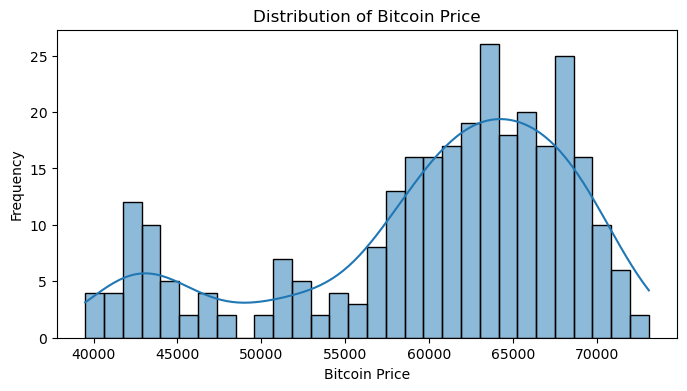

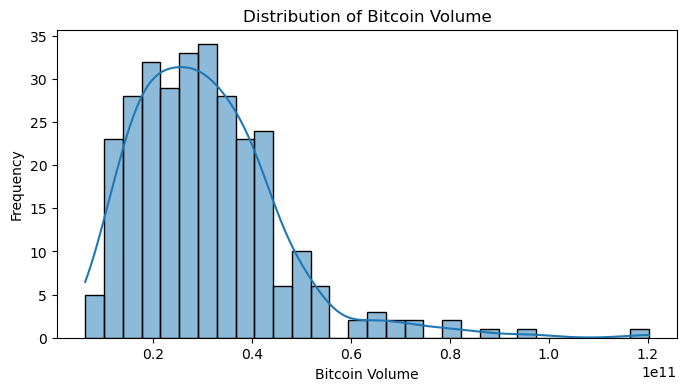

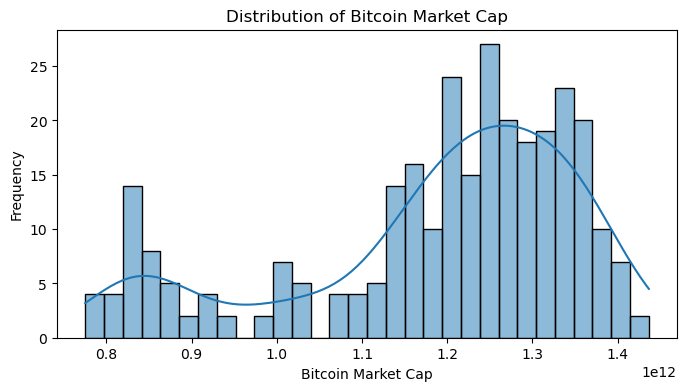

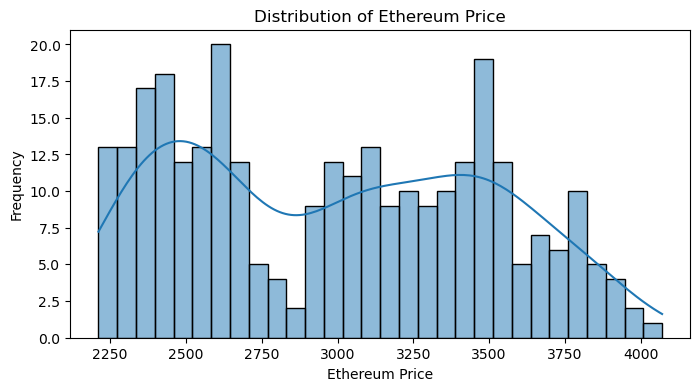

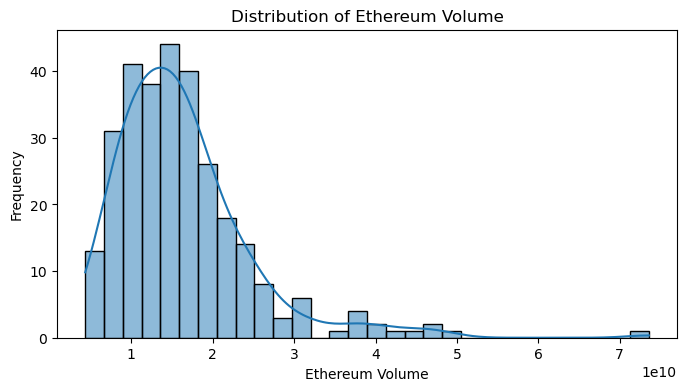

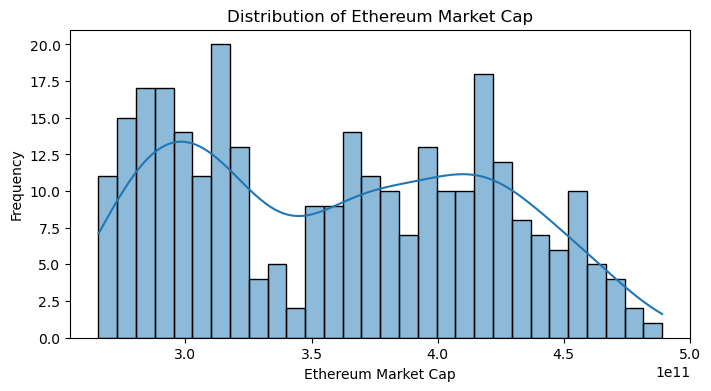

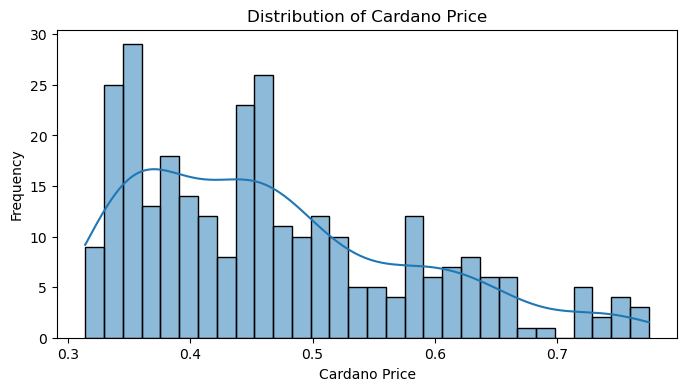

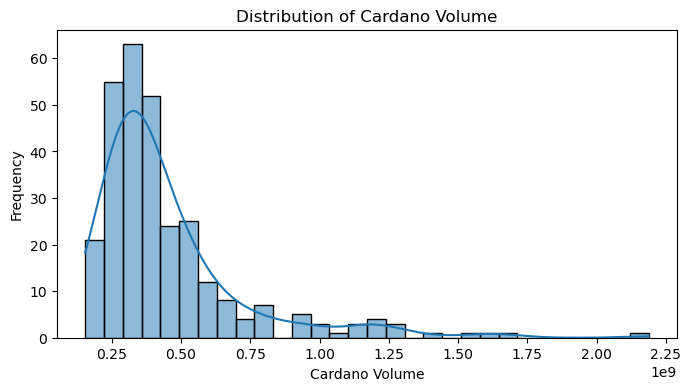

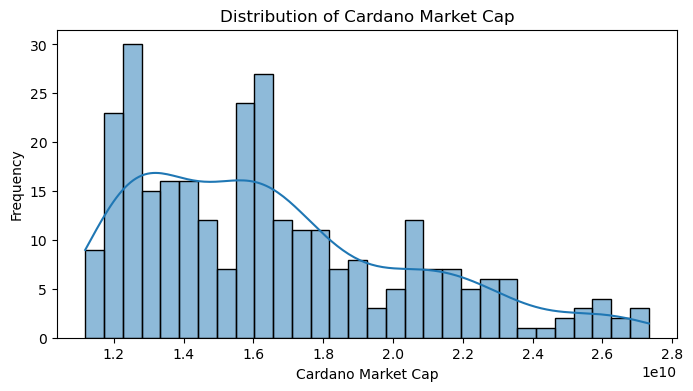

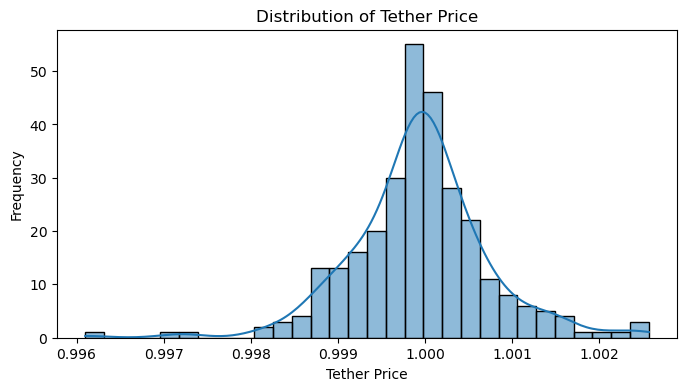

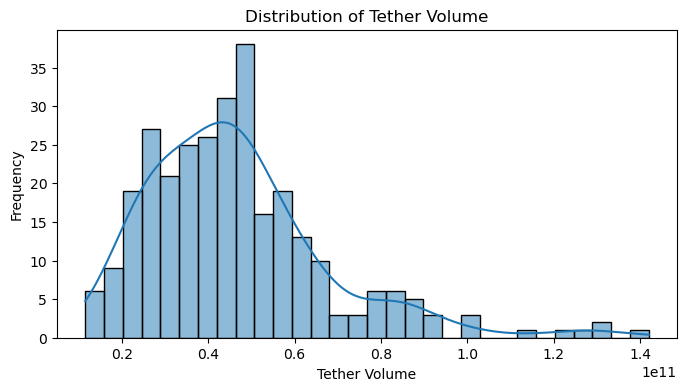

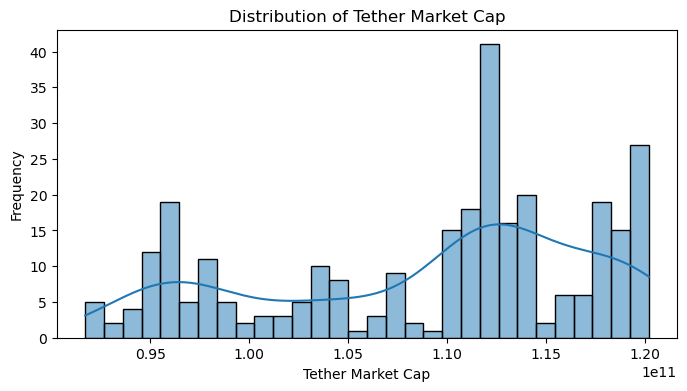

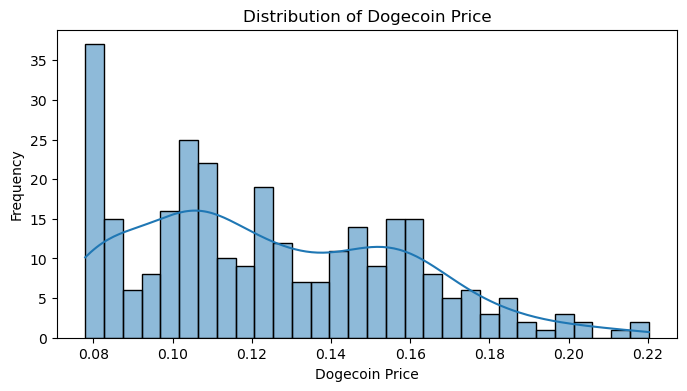

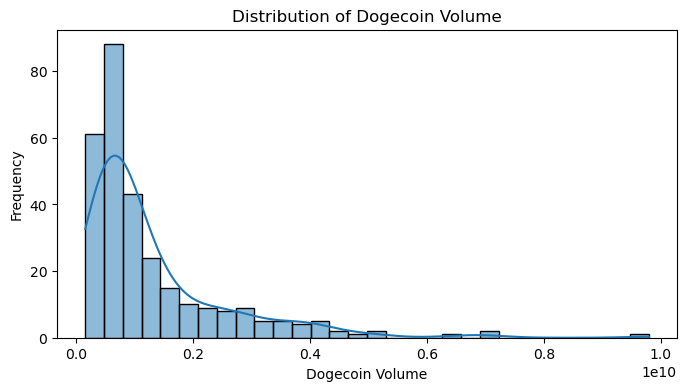

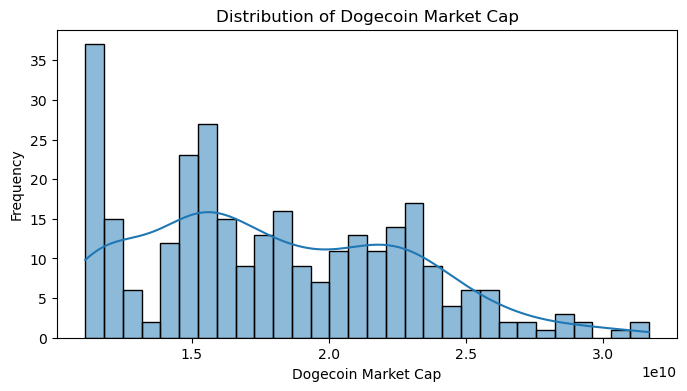

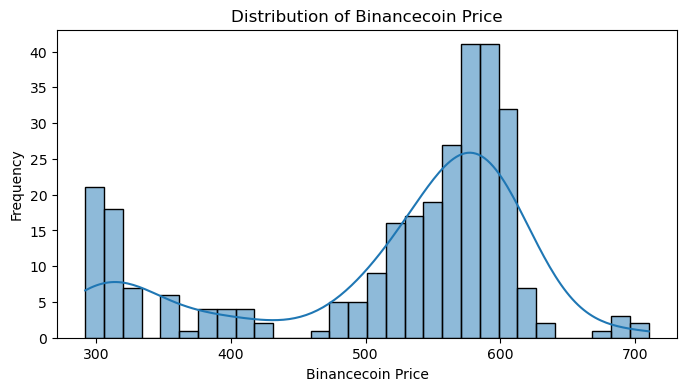

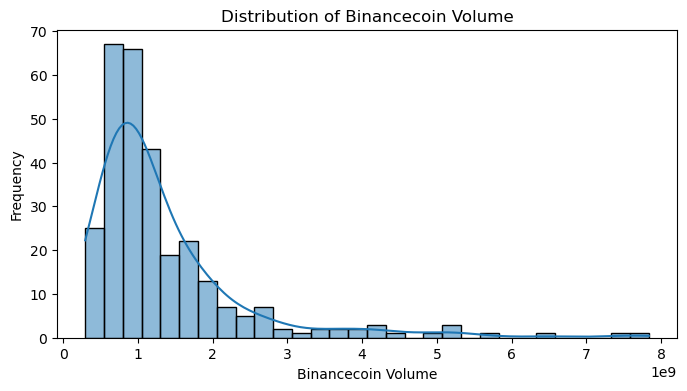

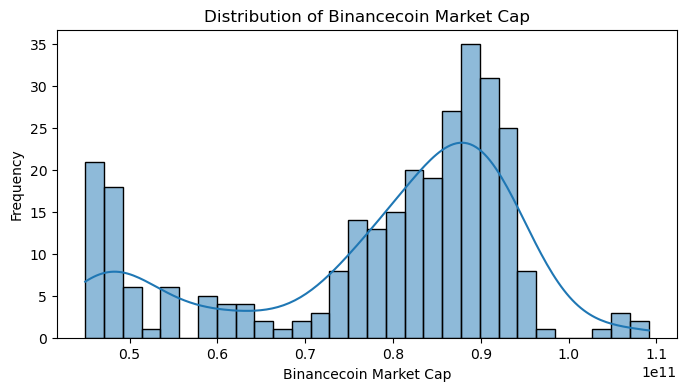

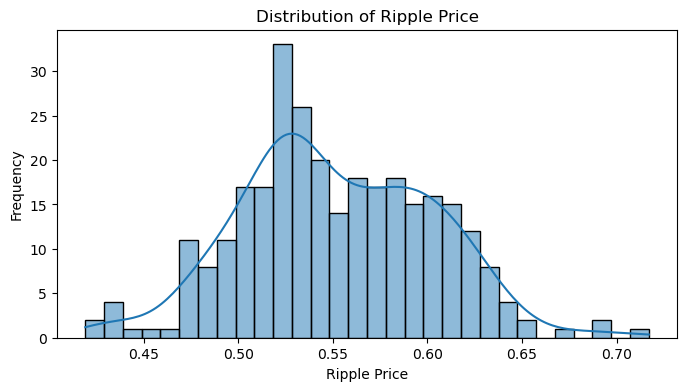

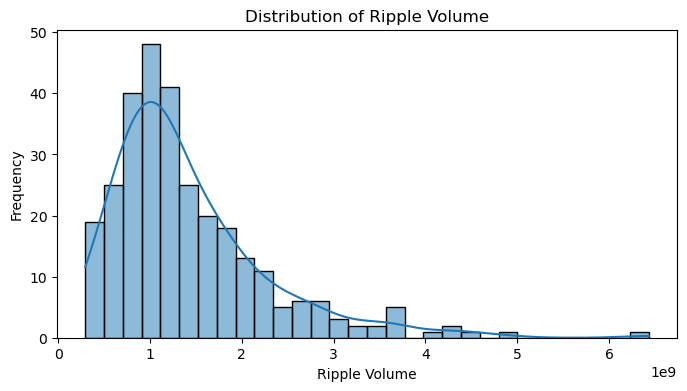

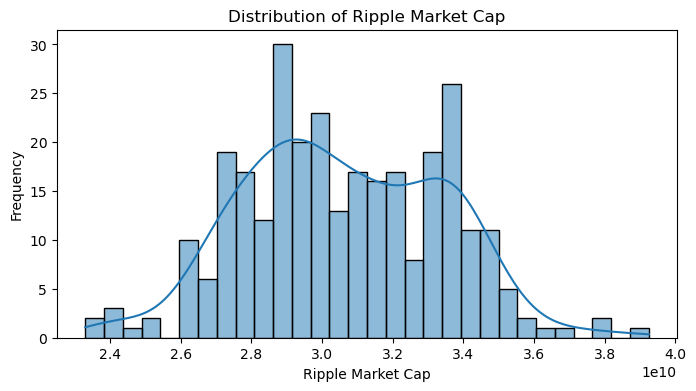

                                       Mean               Median            Std Dev                Min                  Max  Skewness
Bitcoin Price                     60,302.64            62,734.39           8,465.40          39,504.73            73,097.77     -0.99
Bitcoin Volume            30,712,706,005.21    28,680,123,269.72  15,221,383,857.41   6,340,606,686.25   120,245,972,389.37      1.69
Bitcoin Market Cap     1,187,827,383,219.39 1,236,312,176,673.45 167,988,635,286.05 775,020,895,102.29 1,436,631,290,571.54     -1.01
Ethereum Price                     2,990.96             3,015.16             504.53           2,211.17             4,070.60      0.14
Ethereum Volume           16,305,861,050.42    14,902,982,165.59   8,416,351,963.09   4,334,792,607.36    73,571,034,926.63      2.19
Ethereum Market Cap      359,810,410,460.16   362,686,607,634.32  60,686,068,786.94 265,547,288,684.82   488,931,556,413.24      0.13
Cardano Price                          0.47                 0.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis(df, save_folder="plots"):
    """
    Perform univariate analysis on a DataFrame, display plots in the notebook, and save images.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame with numerical columns.
    save_folder (str): The folder where images will be saved (default: 'plots').
    
    Returns:
    summary (pandas.DataFrame): Summary statistics for each column.
    """
    
    # Ensure save folder exists
    os.makedirs(save_folder, exist_ok=True)
    
    # Remove underscores from column names
    df.columns = [column.replace('_', ' ') for column in df.columns]
    
    # Set pandas display options to format floats to two decimals and disable scientific notation
    pd.options.display.float_format = '{:,.2f}'.format
    
    # Initialize summary DataFrame with rounded values
    summary = pd.DataFrame({
        'Mean': df.select_dtypes(include=['float64']).mean().round(2),
        'Median': df.select_dtypes(include=['float64']).median().round(2),
        'Std Dev': df.select_dtypes(include=['float64']).std().round(2),
        'Min': df.select_dtypes(include=['float64']).min().round(2),
        'Max': df.select_dtypes(include=['float64']).max().round(2),
        'Skewness': df.select_dtypes(include=['float64']).skew().round(2)
    })
    
    # Iterate over each numerical column to generate and save/display plots
    for column in df.select_dtypes(include=['float64']).columns:
        # Plot histogram with Kernel Density Estimate (KDE) for distribution visualization
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        
        # Save plot to the specified folder
        image_path = os.path.join(save_folder, f"{column}_distribution.png")
        plt.savefig(image_path, dpi=300)
        
        # Display plot in the notebook and then close to free up memory
        plt.show()
        plt.close()
    
    return summary

# Example call to the function
univariate_summary = univariate_analysis(merged_data)
print(univariate_summary)


### KEY INSIGHTS FROM THE UNIVARIATE ANALYSIS

> #### 1. **Bitcoin (BTC)**:
   * **Price**: The mean price is around **60302** with a median slightly higher at **62734**. A significant **negative skew (-0.99)** indicates that the distribution is left-tailed, suggesting that there were some relatively lower price dips compared to the average over this period.
   * **Volume**: With a high mean of **$30.71 billion** and a **positive skew (1.69)**, the volume data shows large spikes in trading, suggesting occasional bursts in activity.
   * **Market Cap**: Similar to the price, the market cap has a **negative skew (-1.01)**, reflecting that some periods had market caps significantly lower than the mean, perhaps indicating market corrections or bearish phases.

> #### 2. **Ethereum (ETH)**:
   * **Price**: Ethereum's price is more symmetric, with a near-zero skew (0.14). The average price is **$2,991**, and it appears to have less volatility compared to Bitcoin as its **standard deviation is lower**.
   * **Volume**: Ethereum's volume shows a **strong positive skew (2.18)**, indicating occasional high-volume trading days, which could suggest speculative activity during certain periods.
   * **Market Cap**: The skewness here is quite close to 0 (0.13), suggesting that Ethereum has had a more stable market cap compared to Bitcoin.

> #### 3. **Cardano (ADA)**:
   * **Price**: Cardano's mean price is **$0.4677**. Its **positive skew (0.79)** indicates more frequent high prices compared to the average, possibly driven by hype cycles.
   * **Volume**: The **high skew (2.56)** in Cardano's trading volume highlights some extreme trading days, which could be linked to events like upgrades or partnerships.
   * **Market Cap**: The **positive skew (0.81)** indicates occasional spikes in market cap, suggesting that interest in Cardano can grow rapidly during certain periods.

> #### 4. **Tether (USDT)**:
   * **Price**: As a **stablecoin**, Tether’s price has minimal volatility, with an almost **zero skew (-0.19)**, which aligns with its intended peg to the US dollar.
   * **Volume**: Despite the stable price, Tether's volume is highly volatile (**skew: 1.43**), indicating that it is frequently used as a liquidity bridge for trading between other cryptocurrencies.
   * **Market Cap**: Tether’s market cap exhibits mild volatility (**skew: -0.54**), which could reflect its supply mechanism adjusting to demand.

> #### 5. **Dogecoin (DOGE)**:
   * **Price**: Dogecoin has a relatively low price at **$0.124** and a **positive skew (0.49)**, indicating that there have been frequent upward movements above the average.
   * **Volume**: With a **high skew (2.58)**, Dogecoin’s trading volume suggests significant spikes, likely tied to social media-driven speculation or news events.
   * **Market Cap**: The **positive skew (0.43)** of Dogecoin’s market cap shows that market sentiment can rapidly change, driving up the value.

> #### 6. **Binance Coin (BNB)**:
   * **Price**: Binance Coin's price is negatively skewed (**-1.03**), meaning there were some relatively lower prices compared to the average. The average price is **$ 516** and a high standard deviation of _\$ 106_, indicating high volatility.
   * **Volume**: Extremely **skewed (2.88)** volume data indicates large spikes in trading activity, which could be tied to significant exchange-related events.
   * **Market Cap**: The **negative skew (-0.91)** in Binance Coin’s market cap suggests that during some periods, the market cap was considerably lower than average, possibly during market corrections.

> #### 7. **Ripple (XRP)**:
   * **Price**: Ripple’s price shows minimal skew (**0.11**), indicating a more balanced distribution around its mean price of **$0.552**.
   * **Volume**: The **positive skew (1.86)** in Ripple's volume suggests occasional large-volume trading days, which could be associated with news or regulatory developments.
   * **Market Cap**: The market cap is slightly skewed (**0.06**), suggesting relative stability around the mean, but Ripple’s legal challenges may impact future stability.

---

> ### <u>General Observations</u>
1. **Bitcoin and Ethereum dominate** the market in terms of market cap and volume, but Bitcoin exhibits more volatility in both price and market cap compared to Ethereum.
2. **Altcoins like Cardano, Dogecoin, and Ripple** show significant spikes in volume, indicating speculative trading behavior.
3. **Stablecoins (Tether)** maintain price stability but exhibit high volume fluctuations, reflecting their role as a trading tool rather than an investment asset.
4. **Skewness** can provide insights into the risk level—assets with higher negative skew (e.g., Bitcoin) are prone to more substantial downside risks, while those with higher positive skew (e.g., Cardano, Dogecoin) may experience frequent price hikes but are also more speculative.

This analysis helps to gauge the **risk profiles** of the different cryptocurrencies, with **Bitcoin** and **Binance Coin** showing more downside risk, while **Cardano** and **Dogecoin** offer speculative, upside-heavy opportunities. **Stablecoins** like Tether play a distinct role, offering stability amidst the volatility.

## <u>**BIVARIATE ANALYSIS**</u> : **Correlation between Bitcoin's price and each other coin's price**



Correlation between Bitcoin Price and Ethereum Price: 0.7295
Correlation between Bitcoin Price and Cardano Price: -0.0080
Correlation between Bitcoin Price and Tether Price: 0.0502
Correlation between Bitcoin Price and Dogecoin Price: 0.8307
Correlation between Bitcoin Price and Binancecoin Price: 0.9111
Correlation between Bitcoin Price and Ripple Price: 0.1967
Correlation of each cryptocurrency with Bitcoin price:
                   Correlation_with_Bitcoin
Binancecoin Price                      0.91
Dogecoin Price                         0.83
Ethereum Price                         0.73
Ripple Price                           0.20
Tether Price                           0.05
Cardano Price                         -0.01


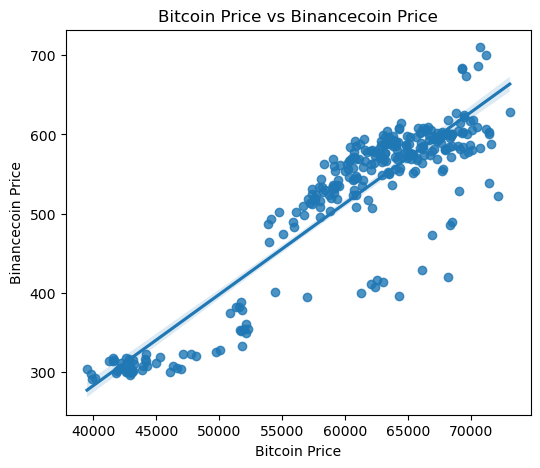

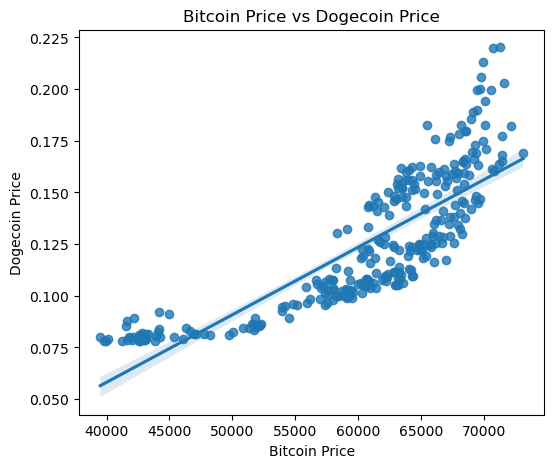

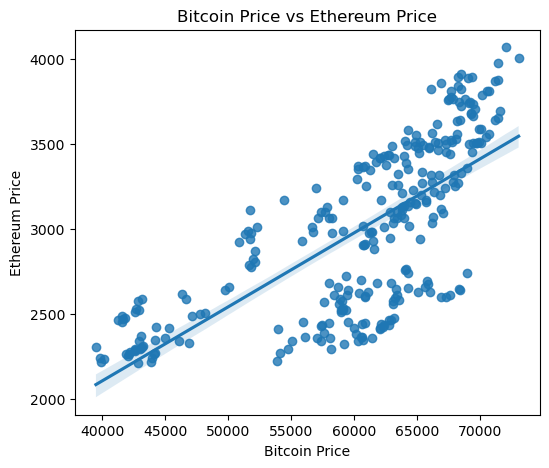

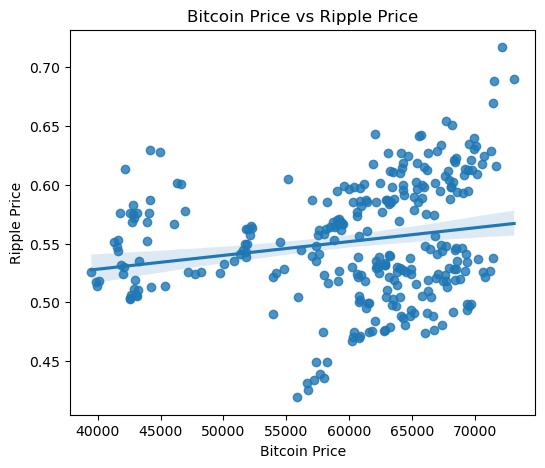

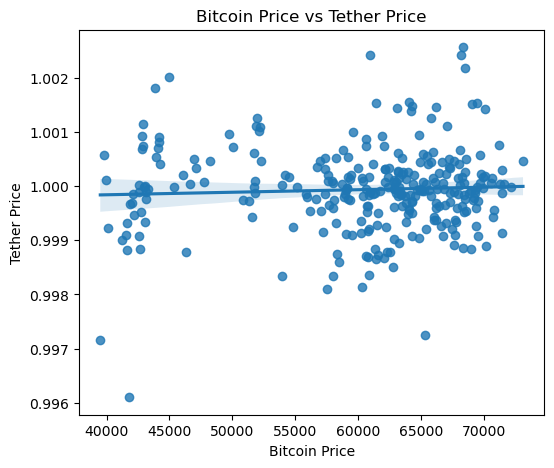

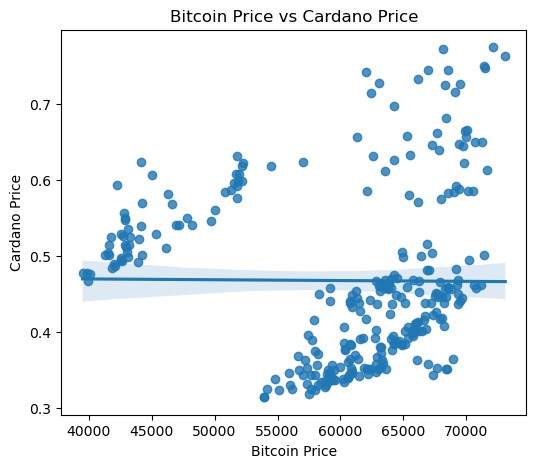

The cryptocurrency most correlated with Bitcoin is: Binancecoin Price


In [ ]:

# Initialize dictionary to store correlation results
correlation_results = {}

# Check column names and compute correlations with Bitcoin_Price
for column in merged_data.columns:
    if 'Price' in column and column != 'Bitcoin Price':
        # Compute correlation with Bitcoin price
        correlation = merged_data['Bitcoin Price'].corr(merged_data[column])
        correlation_results[column] = correlation
        print(f"Correlation between Bitcoin Price and {column}: {correlation:.4f}")

# Convert correlation dictionary to a DataFrame for easy sorting and display
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation_with_Bitcoin'])

# Check if correlation_df is empty before sorting and analyzing
if not correlation_df.empty:
    # Sort correlations in descending order
    correlation_df = correlation_df.sort_values(by='Correlation_with_Bitcoin', ascending=False)
    print("Correlation of each cryptocurrency with Bitcoin price:")
    print(correlation_df)
    
    # Plot scatter plots for Bitcoin vs. other coin prices
    for column in correlation_df.index:
        plt.figure(figsize=(6, 5))
        sns.regplot(x='Bitcoin Price', y=column, data=merged_data)
        plt.title(f"Bitcoin Price vs {column}")
        plt.xlabel("Bitcoin Price")
        plt.ylabel(column)
        plt.show()

    # Identify the coin most correlated with Bitcoin
    most_correlated_coin = correlation_df.idxmax()[0]
    print(f"The cryptocurrency most correlated with Bitcoin is: {most_correlated_coin}")
else:
    print("No valid '_Price' columns found for correlation with Bitcoin Price.")

The cryptocurrency most correlated with Bitcoin is: **Binancecoin_Price**  
Based on the correlation values and graphs above between Bitcoin's price and other cryptocurrency's price, here are some insights:

> 1. **Strong Positive Correlation with Bitcoin (Binancecoin and Dogecoin)** 

 A. *Binancecoin*(0.911):Binancecoin shows the highest correlation with Bitcoin's price at 0.911, which is very close to 2. 
   * This strong positive correlation indicates that Binancecoin's price movements tend to follow Bitcoin's closely.
   * When Bitcoin's price goes up or down, Binancecoin is likely to follow in a similar direction.

 B. *Dogecoin*(8.831):Dogecoin also has a high positive correlation with Bitcoin, though slightly lower than Binancecoin. This suggests that Dogecoin's price moves in the same direction as Bitcoin's most of the time, although it may not be as strongly aligned as Binancecoin.

<u>**Investment Insight**</u>: Binancecoin and Dogecoin are more hand in hand with Bitcoin’s performance, making them potentially suitable choices if someone is looking for cryptocurrencies that tend to follow Bitcoin’s trends. These coins could offer some predictability for investors who want to rely on Bitcoin’s market movement as a proxy for these currencies.

> 2. **Moderate Positive Correlation with Bitcoin (Ethereum)** 

   *Ethereum* (0.730): Ethereum has a moderate positive correlation with Bitcoin, meaning that while it generally follows Bitcoin’s trend, it has some degree of independence. Ethereum's price will often move in the same direction as Bitcoin’s, but not as consistently as Binancecoin or Dogecoin.

<u>**Investment Insight**</u>: Ethereum’s correlation to Bitcoin is noticeable but not very strong, suggesting it offers a balance between following Bitcoin’s trend and having independent price movement. Ethereum may be a good option for investors who want some exposure to Bitcoin-like trends but with added diversification.

> 3. **Weak Positive Correlation with Bitcoin(Ripple and Tether)** 

*Ripple* (0.197): Ripple’s weak positive correlation with Bitcoin indicates that its price does not consistently follow Bitcoin’s movements. While there may be some occasional influence, Ripple largely behaves independently.

   *Tether* (0.050): Tether has an extremely low positive correlation with Bitcoin. Given Tether’s stablecoin nature (often pegged to a fiat currency like the USD), this result is expected. Tether’s price is stable and minimally influenced by Bitcoin’s volatility.

<u>**Investment Insight**</u>: Ripple and Tether show minimal dependence on Bitcoin's trends. Ripple may offer some price volatility and independence, while Tether is generally stable, offering a safer investment option not influenced by Bitcoin’s price swings. Tether, in particular, could be a good choice for risk-averse investors looking to avoid volatility.

> 4. **Slight Negative Correlation with Bitcoin (Cardano)** 

   *Cardano* (-0.008): Cardano has a slightly negative correlation with Bitcoin, which is close to zero. This indicates that Cardano’s price movements are almost entirely independent of Bitcoin’s and may sometimes move in the opposite direction, though weakly.

<u>**Investment Insight**</u>: Cardano’s near-zero or slightly negative correlation with Bitcoin implies that it operates largely independently. For investors looking for a cryptocurrency that doesn’t follow Bitcoin’s movements and offers true diversification, Cardano could be a better option. This independence might also appeal to those who want to spread their investments across assets with minimal interdependence.

**OVERALL SUMMARY**  
* Binancecoin and Dogecoin: Highly correlated with Bitcoin,likely to follow Bitcoin's trends closely.

* Ethereum: Moderately correlated,offering partial alignment with Bitcoin but with some independent behavior.

* Ripple and Tether: Weakly correlated,suggesting they move largely independently from Bitcoin;Tether,in particular,remains stable.

* Cardano: Very low to negative correlation,providing the most independence from Bitcoin's price.

**Recommendation**  
For those looking to mimic Bitcoin’s trend, Binancecoin or Dogecoin are the closest matches. For moderate diversification with some alignment, Ethereum is a good option. If stability or independent movement is preferred, Ripple or Cardano would be suitable, with Tether being the safest for stability.

## **<u>MULTIVARIATE ANALYSIS</u>**

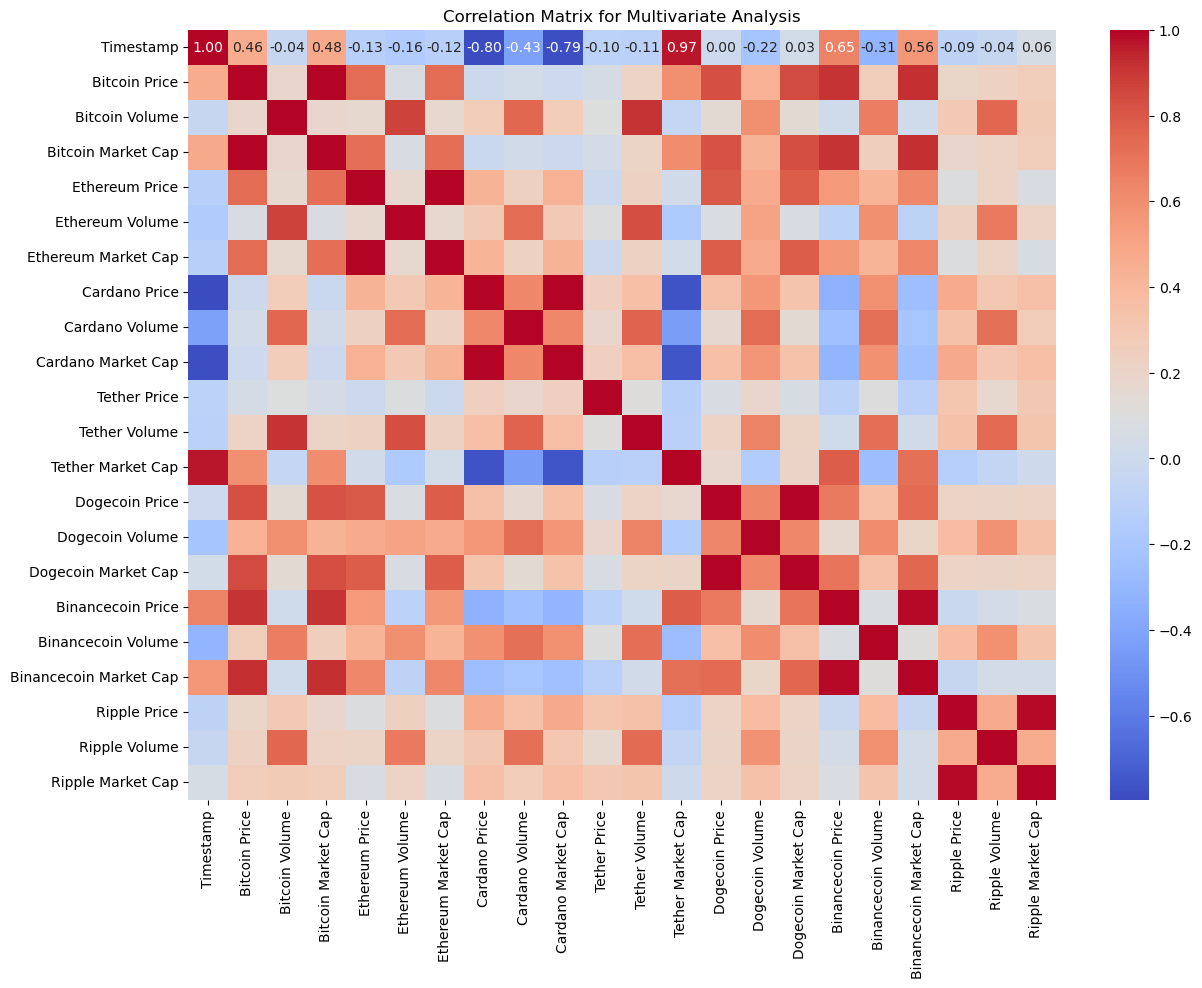

In [7]:
# 1. Compute correlation matrix
correlation_matrix = merged_data.corr()

# 2. Plot heatmap for correlation matrix to visualize relationships
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Multivariate Analysis")
plt.show()




> ### <u>**CORRELATIONS**</u>

  1. Bitcoin’s Market Cap is likely highly correlated with Bitcoin's price and volume, as these metrics often move in tandem.
    
  2. Ethereum and Bitcoin have a stronger correlation across market cap, volume and price than the other cryptocurrencies. This could be due to their ability to offer higher returns than the other coins thus making them a staple in most portfolios.

  3. Dogecoin is fairly correlated with Bitcoin, Ethereum and Binancecoin and less so with Cardano, Tether and Ripple indicating the market favours highly priced currencies over those with a price point of less than **$2**.

You can observe significant correlations among the prices, market caps, and volumes of major cryptocurrencies like Bitcoin, Ethereum, and Cardano. This is common in cryptocurrency markets due to their interconnected movements and similar influencing factors.

  * Cardano Market Cap and Price have an extremely low correlation with Tether Market Cap and Price indicating they are at opposite end of the spectrum in terms of stability.This might mean when Cardano experiences a shift in volatility due to market forces, Tether is used to hedge or secure it as a means to minimise risk.


### MEAN, STANDARD DEVIATION AND VARIANCE ANALYSIS BEFORE  FEATURE  ENGINEERING

                       Mean      Variance  Standard Deviation
Bitcoin Price     60,302.64 71,663,020.81            8,465.40
Ethereum Price     2,990.96    254,554.45              504.53
Cardano Price          0.47          0.01                0.11
Tether Price           1.00          0.00                0.00
Dogecoin Price         0.12          0.00                0.03
Binancecoin Price    516.58     11,397.80              106.76
Ripple Price           0.55          0.00                0.05


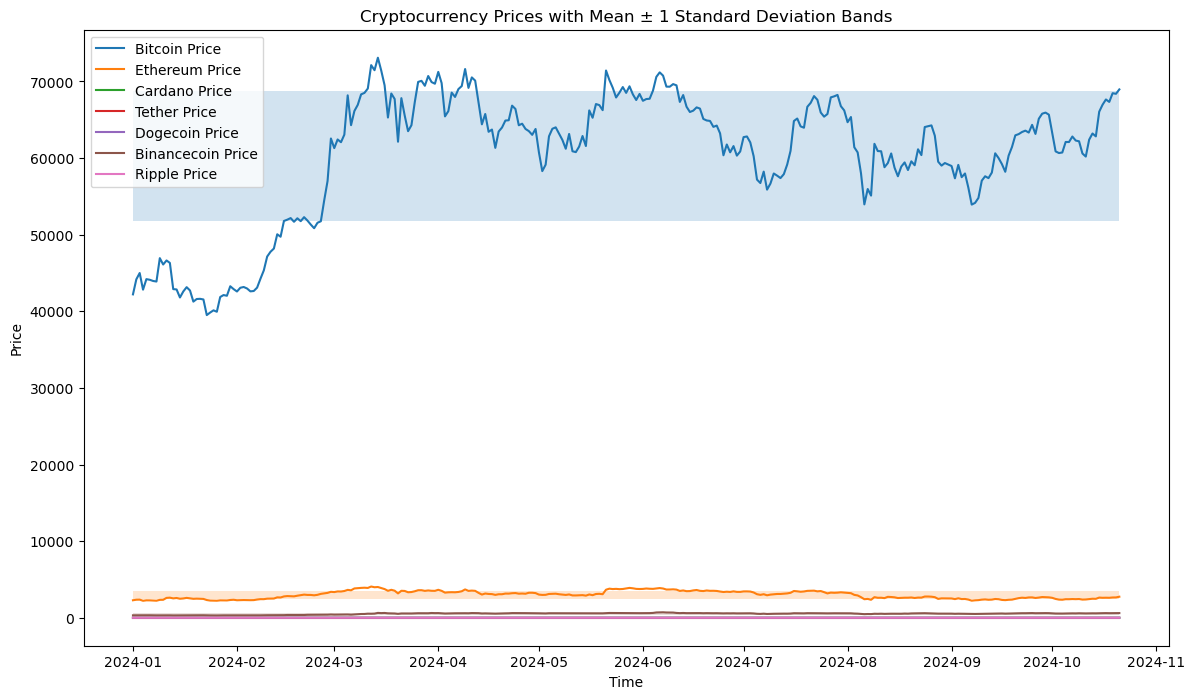

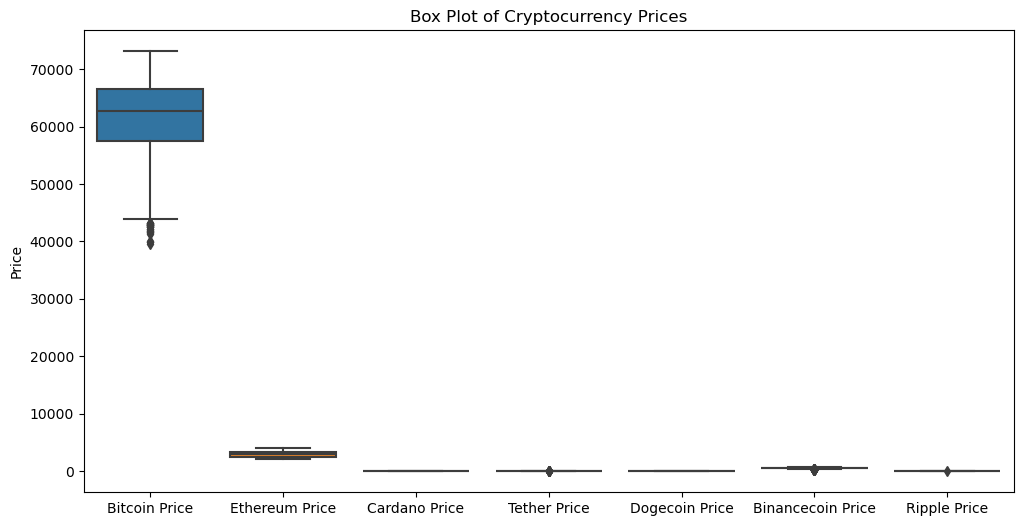

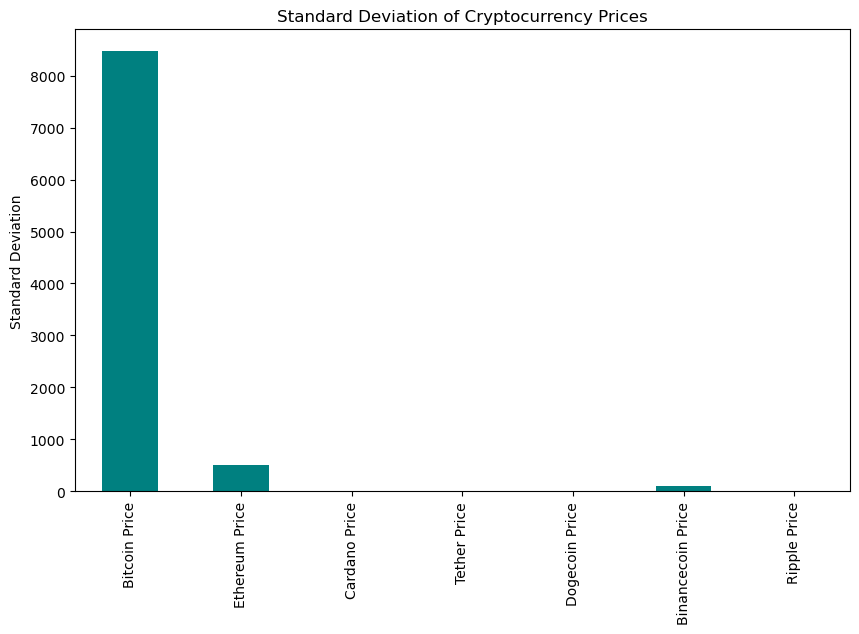

In [8]:
crypto_columns = [
    'Bitcoin Price', 'Ethereum Price', 'Cardano Price', 'Tether Price', 
    'Dogecoin Price', 'Binancecoin Price', 'Ripple Price'
]

# Calculate mean, variance, and standard deviation for prices
price_stats = merged_data[crypto_columns].agg(['mean', 'var', 'std']).T
price_stats.columns = ['Mean', 'Variance', 'Standard Deviation']
print(price_stats)

# Plotting Time Series with Mean ± 1 Standard Deviation Bands
plt.figure(figsize=(14, 8))
for coin in crypto_columns:
    mean = merged_data[coin].mean()
    std_dev = merged_data[coin].std()
    
    # Plot the time series
    plt.plot(merged_data['Timestamp'], merged_data[coin], label=f'{coin}')
    
    # Add Mean ± 1 Standard Deviation Band
    plt.fill_between(
        merged_data['Timestamp'], 
        mean - std_dev, 
        mean + std_dev, 
        alpha=0.2
    )

plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Cryptocurrency Prices with Mean ± 1 Standard Deviation Bands")
plt.legend()
plt.show()

# Plotting Box Plots for Prices
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data[crypto_columns])
plt.title("Box Plot of Cryptocurrency Prices")
plt.ylabel("Price")
plt.show()

# Plotting Standard Deviations as a Bar Plot
plt.figure(figsize=(10, 6))
price_stats['Standard Deviation'].plot(kind='bar', color='teal')
plt.title("Standard Deviation of Cryptocurrency Prices")
plt.ylabel("Standard Deviation")
plt.show()


Bitcoin's mean, standard variation and variance has several outliers and the data needs to be scaled for better use in our Time Series model. We'll use Log transformation for this task

### **TEST FOR STATIONARITY IN THE DATA**

Column: Bitcoin Price
ADF Statistic: -2.2291458628407224
p-value: 0.19583772985576198


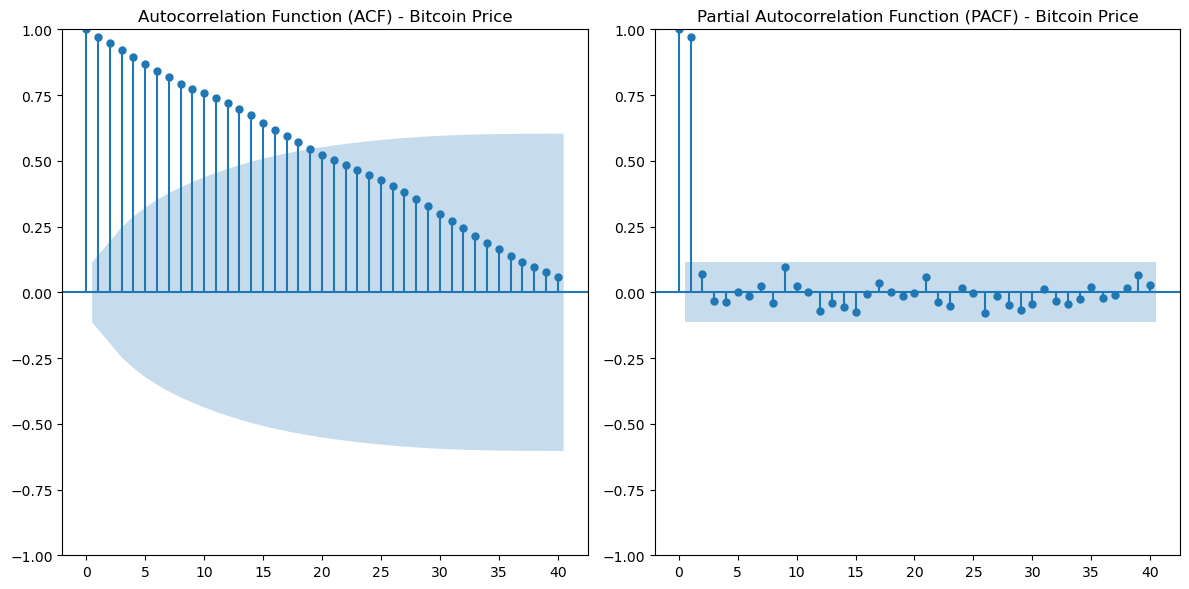

Column: Ethereum Price
ADF Statistic: -1.944612760566512
p-value: 0.311373468349602


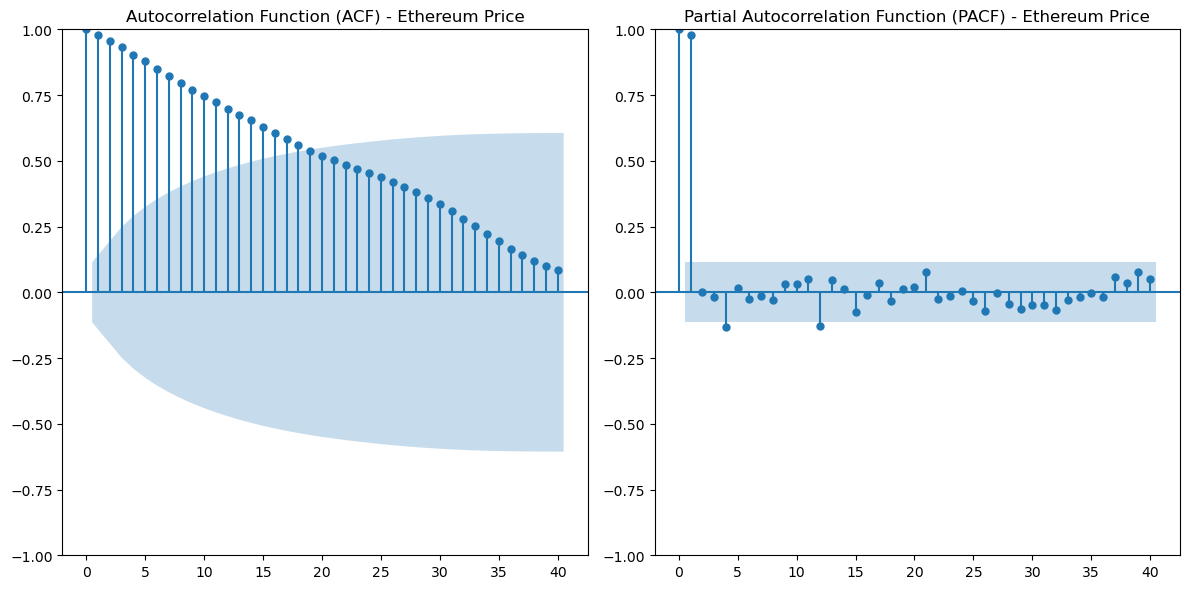

Column: Cardano Price
ADF Statistic: -1.3726438005836425
p-value: 0.5953185091153026


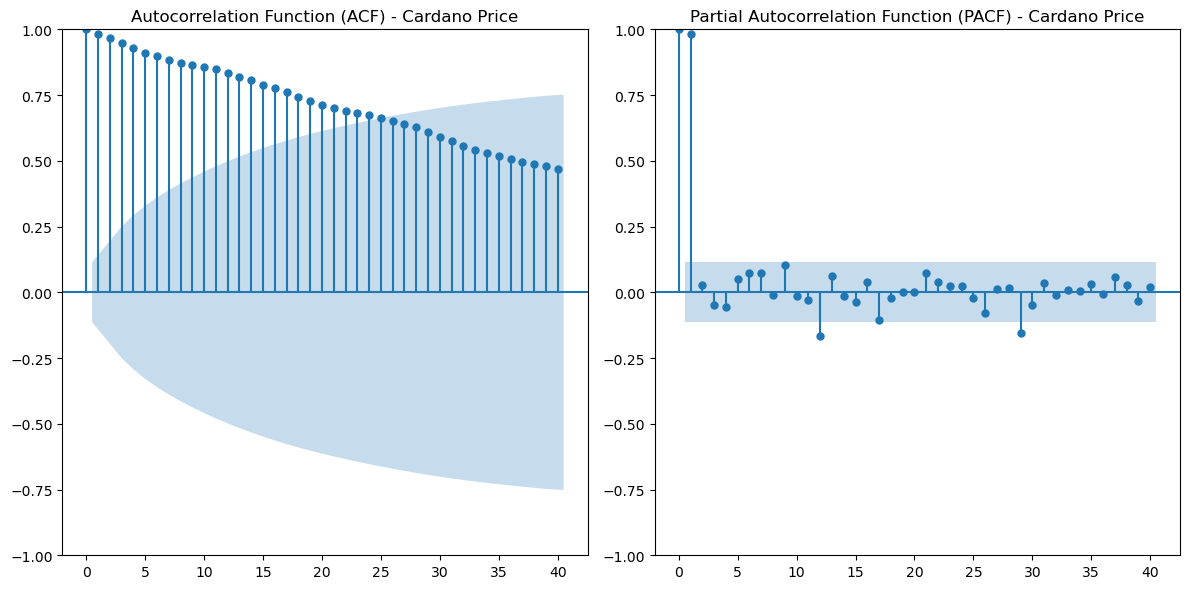

Column: Tether Price
ADF Statistic: -7.842289214091797
p-value: 5.89318066184149e-12


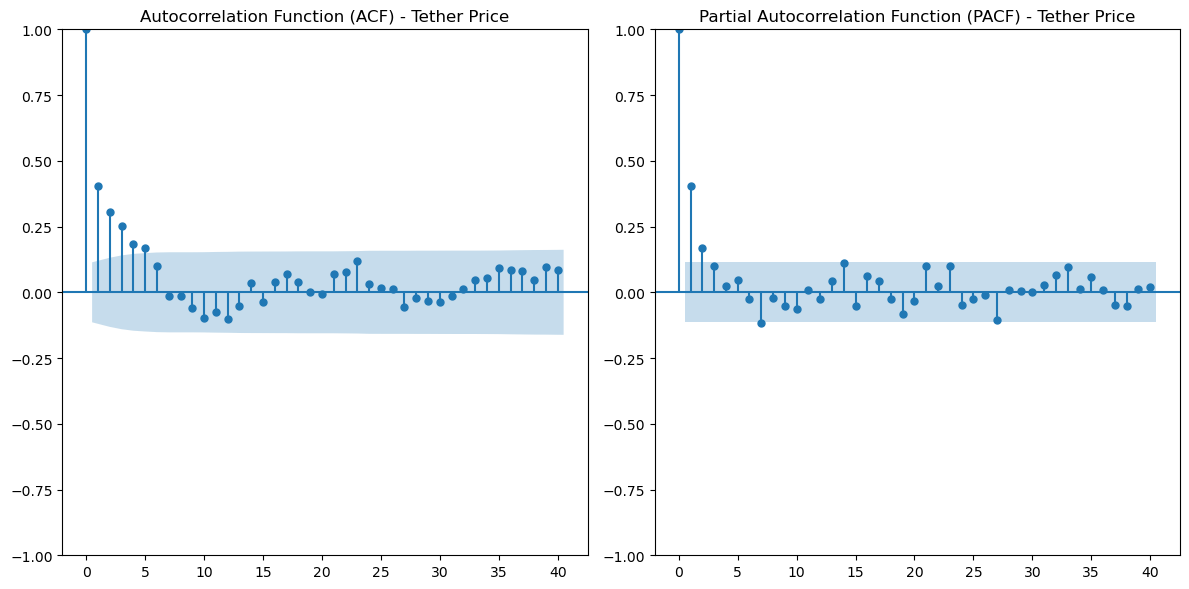

Column: Dogecoin Price
ADF Statistic: -2.0017853819249867
p-value: 0.2857908205266625


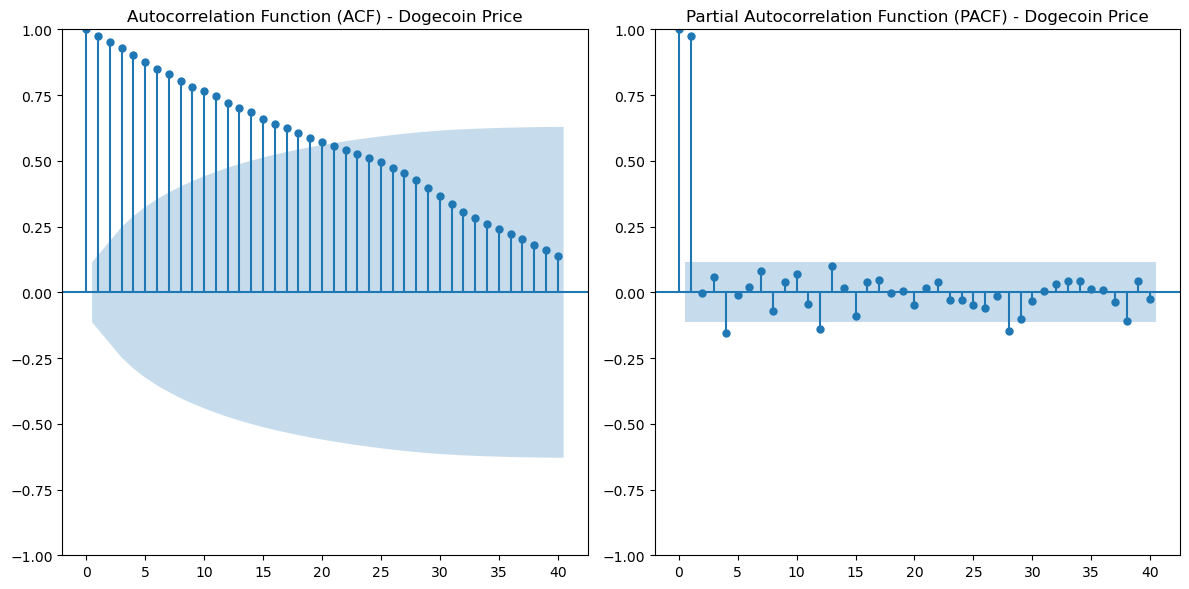

Column: Binancecoin Price
ADF Statistic: -1.8672874629986784
p-value: 0.34760307928340395


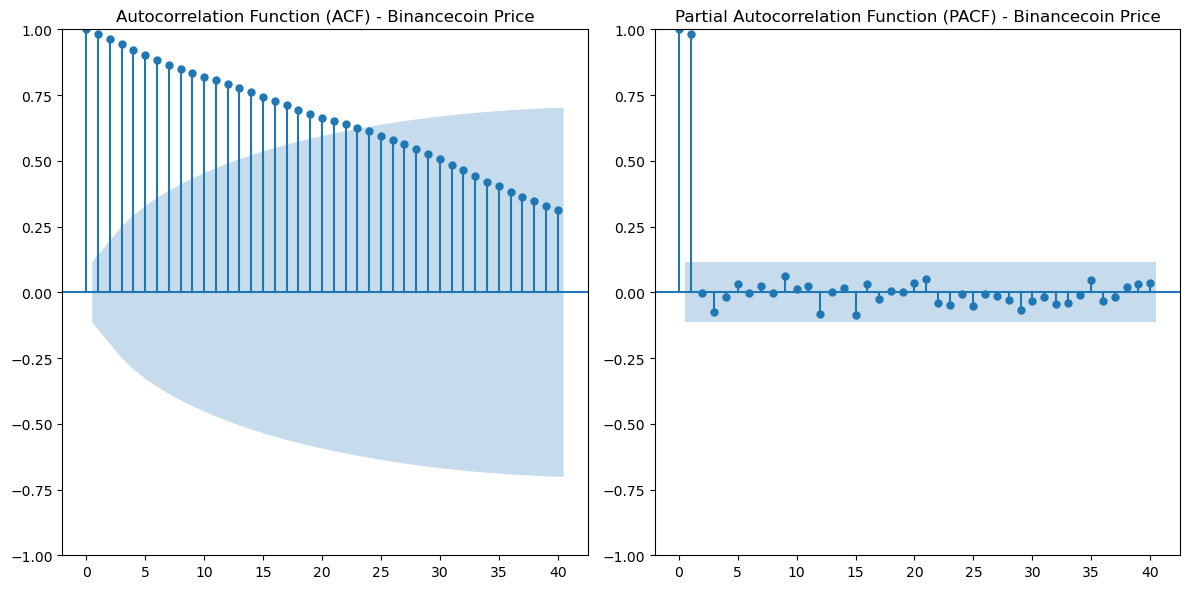

Column: Ripple Price
ADF Statistic: -3.446583677264109
p-value: 0.009469708291804307


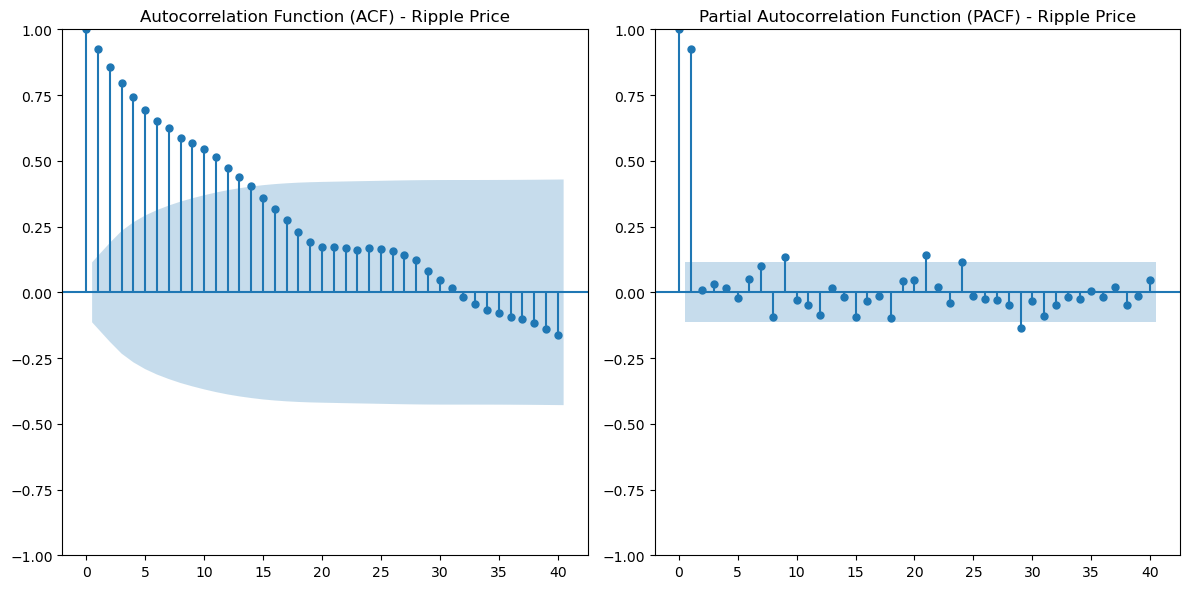

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For ACF and PACF plots
from statsmodels.tsa.stattools import adfuller  # For ADF test to check stationarity


# Iterate through each cryptocurrency column
for column in crypto_columns:
    ts = merged_data[column]                   # Select the time series for the current cryptocurrency
    
    # Check for stationarity using the Augmented Dickey-Fuller test
    adf_result = adfuller(ts)          # Perform the ADF test
    print(f'Column: {column}')         # Print the current column name
    print(f'ADF Statistic: {adf_result[0]}')  # Print ADF statistic
    print(f'p-value: {adf_result[1]}')        # Print p-value
    # Check if p-value < 0.05 to determine if the series is stationary

    # Create ACF and PACF plots
    plt.figure(figsize=(12, 6))        # Set the figure size for the plots
    
    # Create ACF plot
    plt.subplot(1, 2, 1)               # Create a subplot for ACF
    plot_acf(ts, lags=40, ax=plt.gca()) # Plot ACF for the time series with 40 lags
    plt.title(f'Autocorrelation Function (ACF) - {column}')  # Title for ACF plot

    # Create PACF plot
    plt.subplot(1, 2, 2)               # Create a subplot for PACF
    plot_pacf(ts, lags=40, ax=plt.gca()) # Plot PACF for the time series with 40 lags
    plt.title(f'Partial Autocorrelation Function (PACF) - {column}')  # Title for PACF plot

    # Show the plots
    plt.tight_layout()                  # Adjust subplots to fit into figure area
    plt.show()                         # Display the plots

* A high p_value for all coins except Ripple indicate high stationarity. 
    * This leads us to consider log transformation as the best option for dealing with the lack of stationarity. 
* A time series is said to be stationary if its statistical properties, like mean, variance, and autocorrelation, do not change over time. 
    * In other words, a stationary time series has a stable behavior over time, making it easier to model and predict.

>  **<u>LOG TRANSFORMATION</u>**

* Log Transformation is particularly useful if the data spans several orders of magnitude, which is common in financial data like cryptocurrency prices.
* This method takes the logarithm of the prices, reduces the effect of extreme values and compresses the scale, making it easier to compare cryptocurrencies with large price differences. 
* This is particularly useful as the prices follow a multiplicative (exponential) growth pattern.

In [10]:
import numpy as np

log_df = merged_data[crypto_columns].apply(np.log)


In [11]:
log_df

Bitcoin Price  Ethereum Price  Cardano Price  Tether Price  Dogecoin Price  Binancecoin Price  Ripple Price
0            10.65            7.73          -0.52         -0.00           -2.42               5.74         -0.49
1            10.70            7.76          -0.47          0.00           -2.39               5.75         -0.46
2            10.71            7.77          -0.50          0.00           -2.39               5.74         -0.47
3            10.66            7.70          -0.59          0.00           -2.50               5.76         -0.54
4            10.70            7.73          -0.56          0.00           -2.48               5.78         -0.53
..             ...             ...            ...           ...             ...                ...           ...
290          11.12            7.87          -1.04         -0.00           -2.07               6.40         -0.60
291          11.12            7.86          -1.07         -0.00           -2.05               6.38         -0.61
292          11.13            7.88          -1.05          0.00           -1.98               6.40         -0.60
293          11.13            7.88          -1.05          0.00           -1.93               6.39         -0.61
294          11.14            7.92          -1.01         -0.00           -1.95               6.40         -0.60

[295 rows x 7 columns]

In [12]:
log_df['Timestamp'] = merged_data['Timestamp']
log_df

Bitcoin Price  Ethereum Price  Cardano Price  Tether Price  Dogecoin Price  Binancecoin Price  Ripple Price  Timestamp
0            10.65            7.73          -0.52         -0.00           -2.42               5.74         -0.49 2024-01-01
1            10.70            7.76          -0.47          0.00           -2.39               5.75         -0.46 2024-01-02
2            10.71            7.77          -0.50          0.00           -2.39               5.74         -0.47 2024-01-03
3            10.66            7.70          -0.59          0.00           -2.50               5.76         -0.54 2024-01-04
4            10.70            7.73          -0.56          0.00           -2.48               5.78         -0.53 2024-01-05
..             ...             ...            ...           ...             ...                ...           ...        ...
290          11.12            7.87          -1.04         -0.00           -2.07               6.40         -0.60 2024-10-17
291          11.12            7.86          -1.07         -0.00           -2.05               6.38         -0.61 2024-10-18
292          11.13            7.88          -1.05          0.00           -1.98               6.40         -0.60 2024-10-19
293          11.13            7.88          -1.05          0.00           -1.93               6.39         -0.61 2024-10-20
294          11.14            7.92          -1.01         -0.00           -1.95               6.40         -0.60 2024-10-21

[295 rows x 8 columns]

In [13]:
# Create a copy of the log_df DataFrame
log_df_copy = log_df.copy()

### CREATE INSTANCES FOR ARIMA, SARIMAX AND PROPHET TIME SERIES MODELS


Fitting models for Bitcoin Price...
ADF Statistic: -2.2291458628407224
p-value: 0.19583772985576198
ADF Statistic: -18.480079752160027
p-value: 2.1338583713983666e-30
                               SARIMAX Results                                
Dep. Variable:          Bitcoin Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2599.009
Date:                Thu, 07 Nov 2024   AIC                           5204.017
Time:                        09:30:20   BIC                           5215.068
Sample:                             0   HQIC                          5208.443
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6959      0.604     -1.15

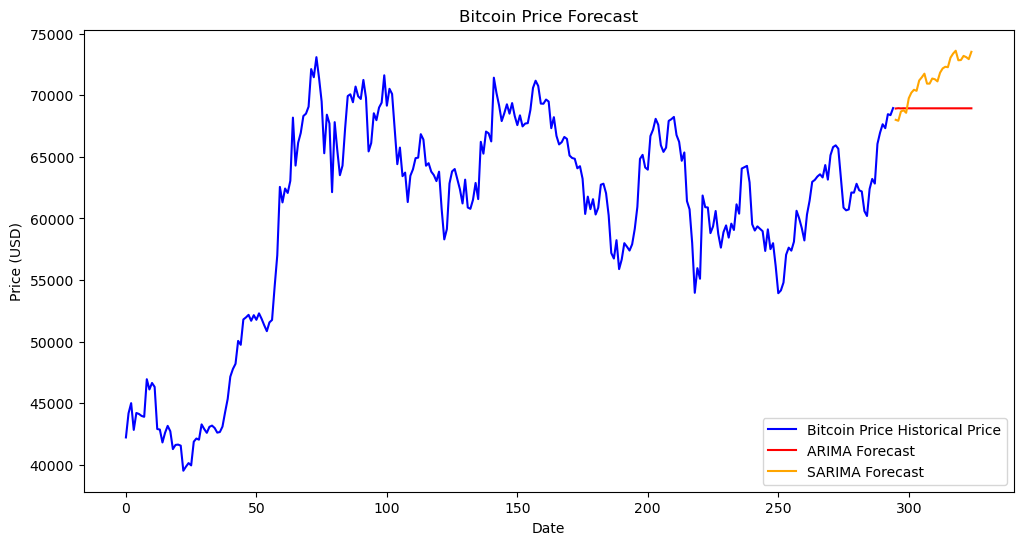


Fitting models for Ethereum Price...
ADF Statistic: -1.944612760566512
p-value: 0.311373468349602
ADF Statistic: -17.145190154907976
p-value: 7.001814574241177e-30
                               SARIMAX Results                                
Dep. Variable:         Ethereum Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1767.253
Date:                Thu, 07 Nov 2024   AIC                           3540.506
Time:                        09:30:24   BIC                           3551.556
Sample:                             0   HQIC                          3544.931
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0027     12.218     -0.000  

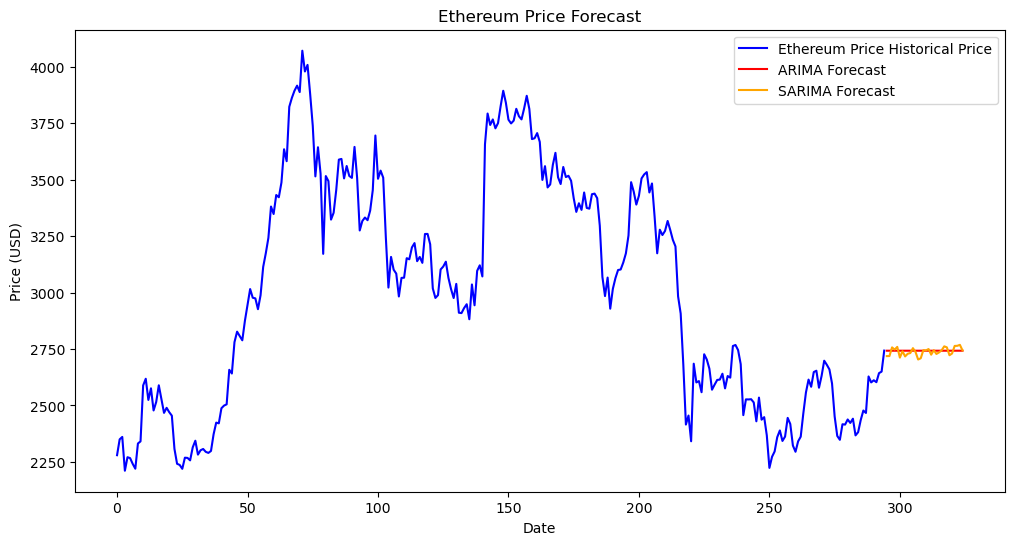


Fitting models for Cardano Price...
ADF Statistic: -1.3726438005836425
p-value: 0.5953185091153026
ADF Statistic: -4.647949342080262
p-value: 0.00010528629039930044
                               SARIMAX Results                                
Dep. Variable:          Cardano Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 751.204
Date:                Thu, 07 Nov 2024   AIC                          -1496.408
Time:                        09:30:28   BIC                          -1485.358
Sample:                             0   HQIC                         -1491.983
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0319      0.563     -0.057 

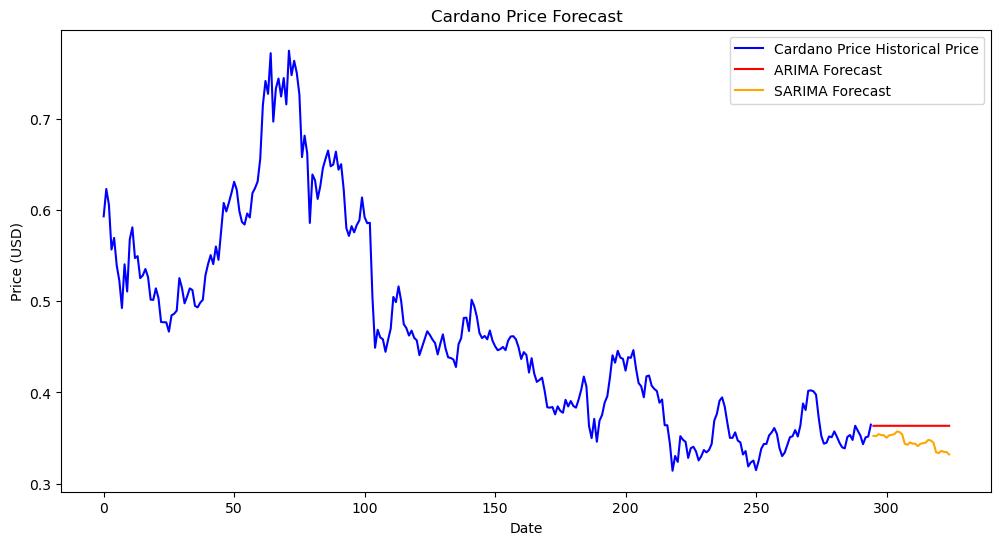


Fitting models for Tether Price...
ADF Statistic: -7.842289214091797
p-value: 5.89318066184149e-12


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Tether Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1702.092
Date:                Thu, 07 Nov 2024   AIC                          -3398.184
Time:                        09:30:32   BIC                          -3387.133
Sample:                             0   HQIC                         -3393.758
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0545      0.108      0.503      0.615      -0.158       0.267
ma.L1         -0.6251      0.085     -7.338      0.000      -0.792      -0.458
sigma2      5.442e-07   2.56e-08     21.236      0.0

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                       Tether Price   No. Observations:                  295
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                1585.747
Date:                            Thu, 07 Nov 2024   AIC                          -3161.494
Time:                                    09:30:34   BIC                          -3143.285
Sample:                                         0   HQIC                         -3154.192
                                            - 295                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0207      0.096      0.214      0.830      -0.168       0.210
ma.L1         -0.5322      0.088   

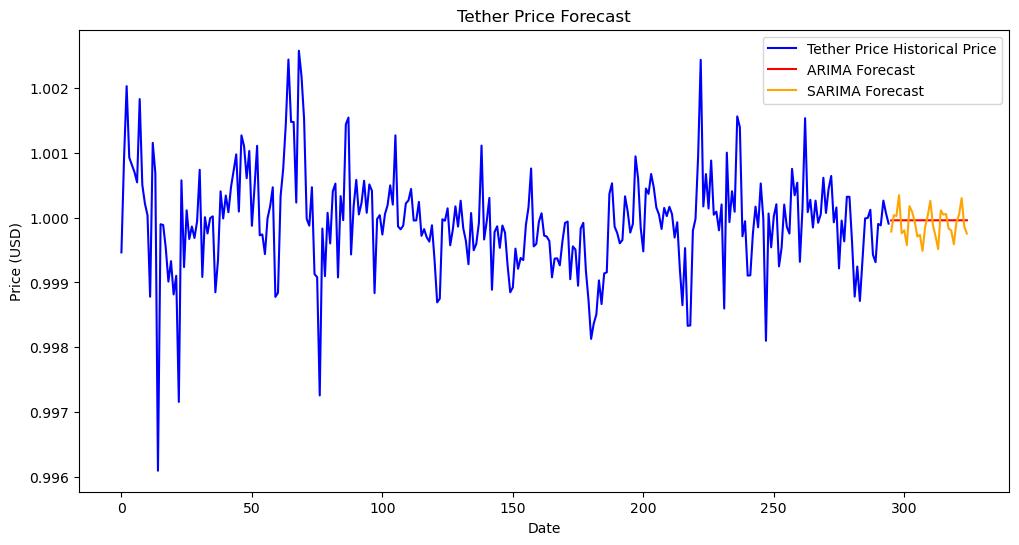


Fitting models for Dogecoin Price...
ADF Statistic: -2.0017853819249867
p-value: 0.2857908205266625
ADF Statistic: -4.973668239235519
p-value: 2.5016151284947798e-05
                               SARIMAX Results                                
Dep. Variable:         Dogecoin Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1040.517
Date:                Thu, 07 Nov 2024   AIC                          -2075.033
Time:                        09:30:35   BIC                          -2063.983
Sample:                             0   HQIC                         -2070.608
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -2.299e-07      0.018  -1.31e-05

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     Dogecoin Price   No. Observations:                  295
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 981.020
Date:                            Thu, 07 Nov 2024   AIC                          -1952.040
Time:                                    09:30:39   BIC                          -1933.830
Sample:                                         0   HQIC                         -1944.738
                                            - 295                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7583      0.107     -7.082      0.000      -0.968      -0.548
ma.L1          0.8568      0.087   

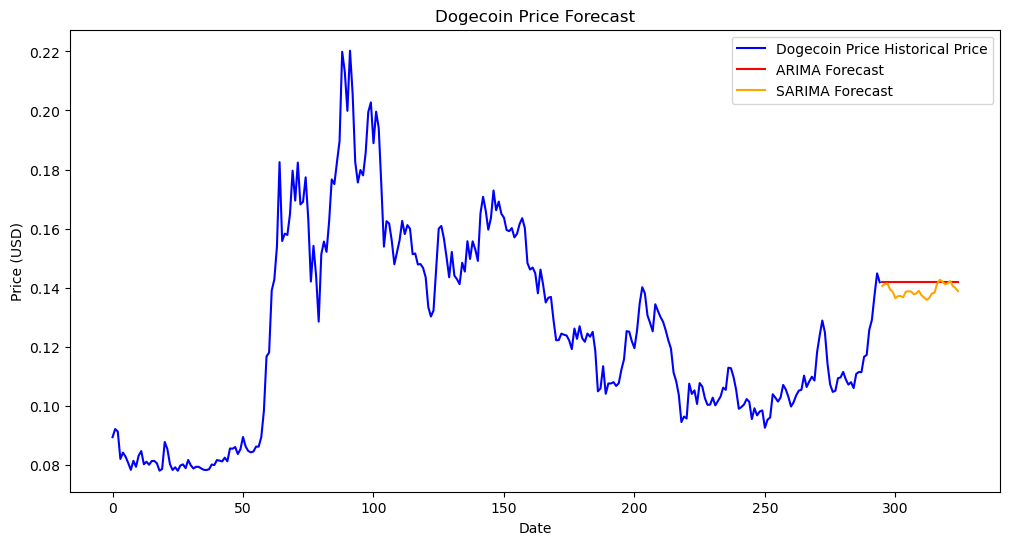


Fitting models for Binancecoin Price...
ADF Statistic: -1.8672874629986784
p-value: 0.34760307928340395
ADF Statistic: -10.93725054161796
p-value: 9.491073025801475e-20
                               SARIMAX Results                                
Dep. Variable:      Binancecoin Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1229.549
Date:                Thu, 07 Nov 2024   AIC                           2465.098
Time:                        09:30:40   BIC                           2476.149
Sample:                             0   HQIC                          2469.524
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5360      0.824      0.

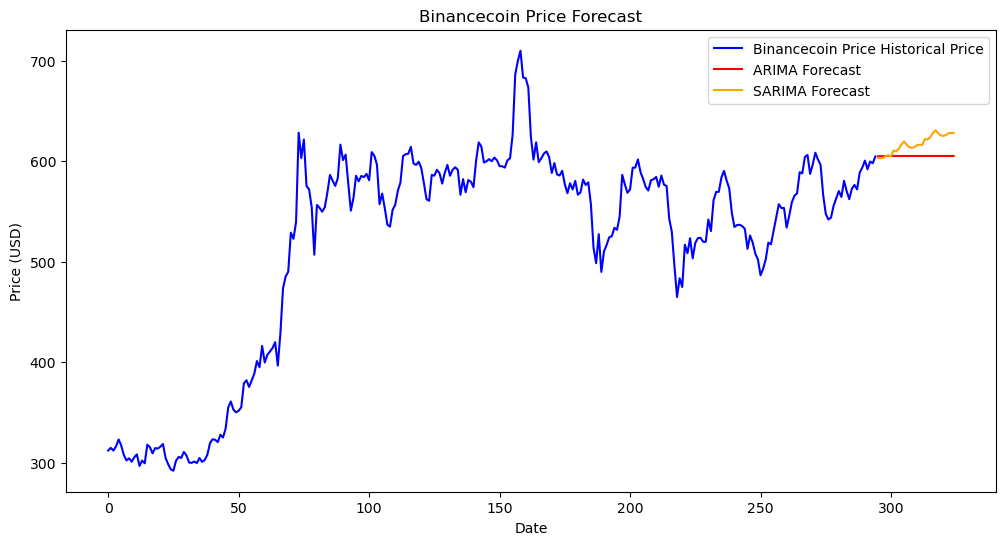


Fitting models for Ripple Price...
ADF Statistic: -3.446583677264109
p-value: 0.009469708291804307


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:           Ripple Price   No. Observations:                  295
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 746.794
Date:                Thu, 07 Nov 2024   AIC                          -1487.588
Time:                        09:30:43   BIC                          -1476.537
Sample:                             0   HQIC                         -1483.162
                                - 295                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9325      0.023     40.075      0.000       0.887       0.978
ma.L1         -0.9999      0.808     -1.237      0.216      -2.584       0.584
sigma2         0.0004      0.000      1.229      0.2

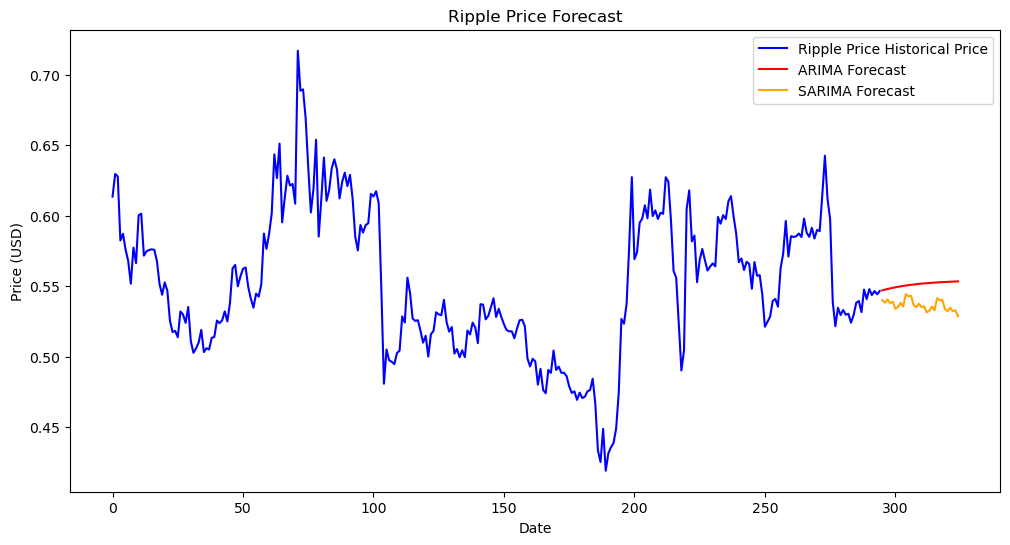

In [14]:
# Import necessary libraries

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

log_df['Timestamp'] = pd.to_datetime(log_df['Timestamp'])  # Ensure Timestamp is datetime
log_df.set_index('Timestamp', inplace=True)

# Define a function to test stationarity
def test_stationarity(ts):
    adf_result = adfuller(ts)
    print(f'ADF Statistic: {adf_result[0]}')
    print(f'p-value: {adf_result[1]}')
    return adf_result[1]

# Define a function to fit ARIMA and SARIMA models
def fit_time_series_models(price_series, coin_name):
    print(f"\nFitting models for {coin_name}...")

    # Check for stationarity
    p_value = test_stationarity(price_series.dropna())
    
    # Differencing if necessary
    if p_value > 0.05:
        price_series_diff = price_series.diff().dropna()
        p_value_diff = test_stationarity(price_series_diff)
    else:
        price_series_diff = price_series
        
    # Fit ARIMA model
    p, d, q = 1, 1, 1  # Change as needed
    arima_model = ARIMA(price_series, order=(p, d, q))
    arima_result = arima_model.fit()
    print(arima_result.summary())

    # Forecasting with ARIMA
    arima_forecast = arima_result.forecast(steps=30)
    
    # Fit SARIMA model
    P, D, Q, s = 1, 1, 1, 12  # Change as needed
    sarima_model = SARIMAX(price_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
    sarima_result = sarima_model.fit()
    print(sarima_result.summary())

    # Forecasting with SARIMA
    sarima_forecast = sarima_result.forecast(steps=30)
    
    # Plotting results
    plt.figure(figsize=(12, 6))
    plt.plot(price_series, label=f'{coin_name} Historical Price', color='blue')
    plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
    plt.plot(sarima_forecast, label='SARIMA Forecast', color='orange')
    plt.title(f'{coin_name} Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# List of cryptocurrencies
coins = ['Bitcoin Price', 'Ethereum Price', 'Cardano Price', 'Tether Price', 
         'Dogecoin Price', 'Binancecoin Price', 'Ripple Price']

# Fit models for each coin
for coin in coins:
    fit_time_series_models(merged_data[coin], coin)


> <u>**ADF Test Results**</u>

* ADF Statistic: The first ADF statistic is -2.1604, with a p-value of 0.2209, indicating that the series is likely non-stationary (p-value > 0.05).
* Second ADF Statistic: The second statistic is -18.4742, with a very small p-value (2.14e-30), which suggests that the series is stationary after differencing.

> <u>**SARIMAX Model Results**</u>

1. **Model Fit**:

   * SARIMAX(1, 1, 1)x(1, 1, 1, 12) was chosen with a Log Likelihood of -2545.037, AIC of 5100.074, and BIC of 5118.283.
   * The model includes seasonal components, as indicated by the seasonal parameters (ar.S.L12 and ma.S.L12).

2. **Coefficients**:

   * AR(1) coefficient: -0.9960 (highly significant).
   * MA(1) coefficient: 0.9931 (highly significant).
   * Seasonal AR(1) coefficient: 0.2573 (highly significant).
   * Seasonal MA(1) coefficient: -0.8956 (highly significant).
   * The sigma² (variance of the residuals) is 3.774e+06, indicating significant volatility in the data

In [15]:
# Strip any whitespace from column names
log_df.columns = log_df.columns.str.strip()


In [16]:
print(log_df.columns)


Index(['Bitcoin Price', 'Ethereum Price', 'Cardano Price', 'Tether Price', 'Dogecoin Price', 'Binancecoin Price', 'Ripple Price'], dtype='object')


c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


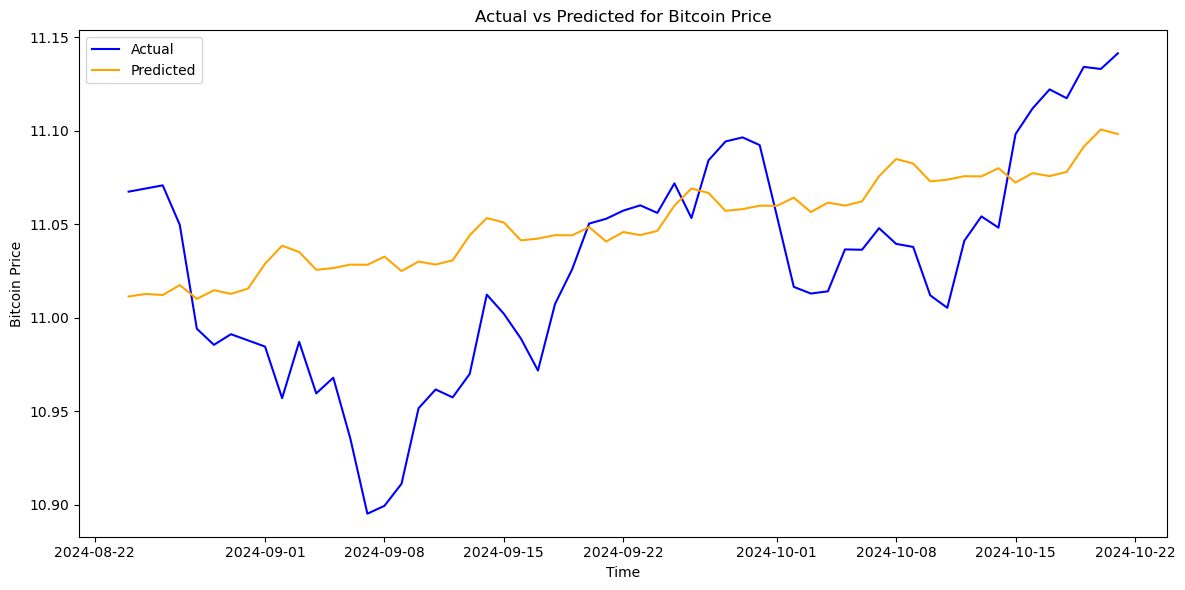

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


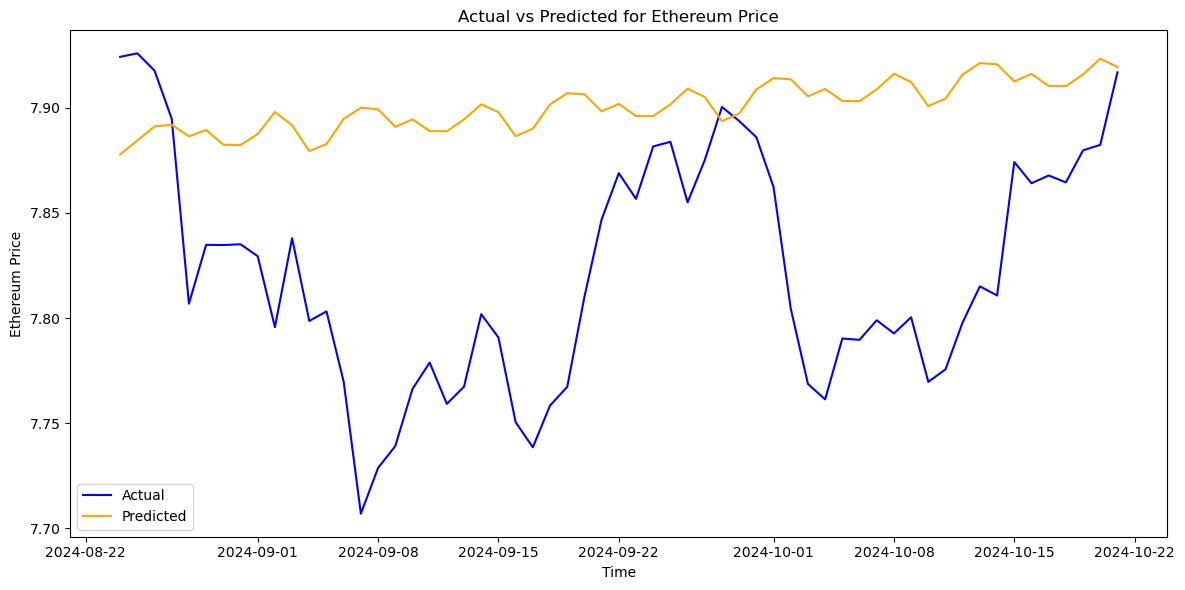

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


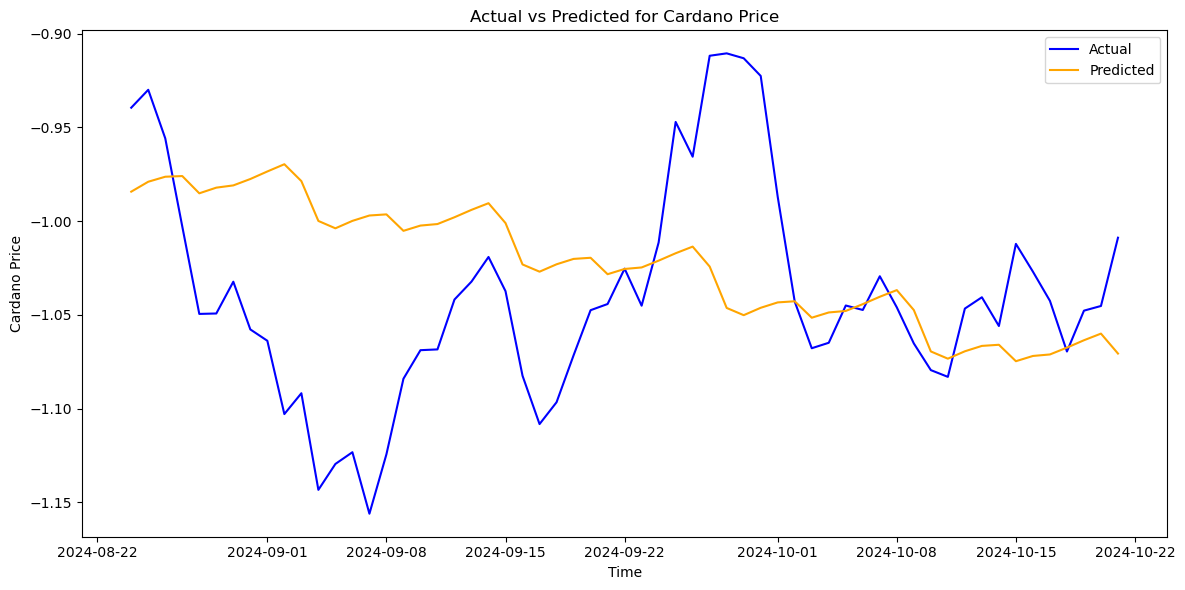

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


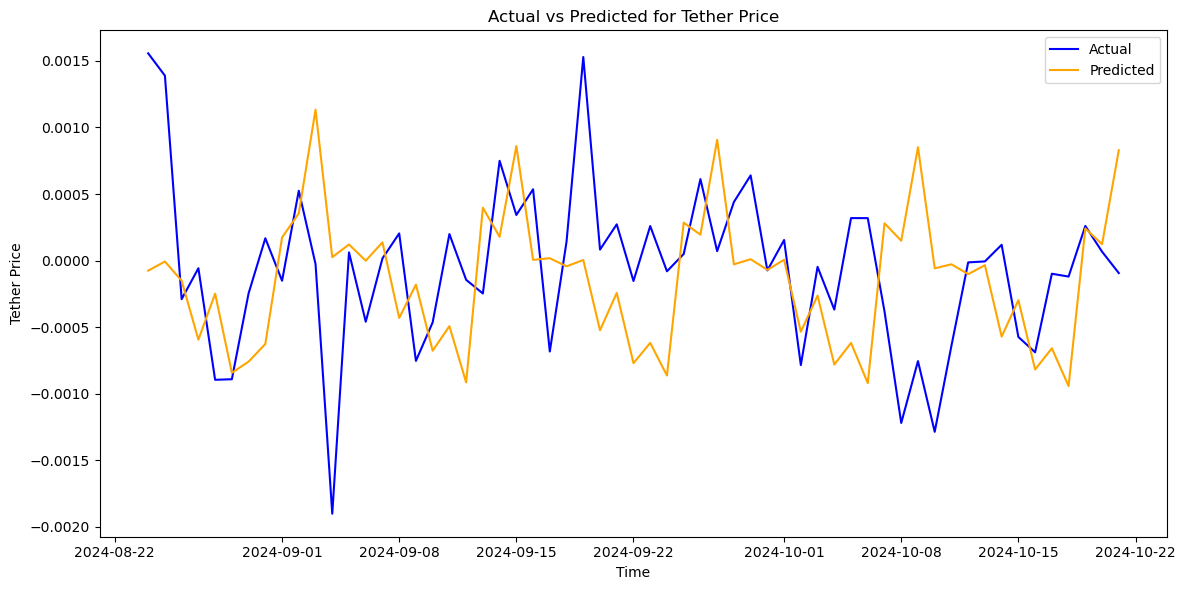

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


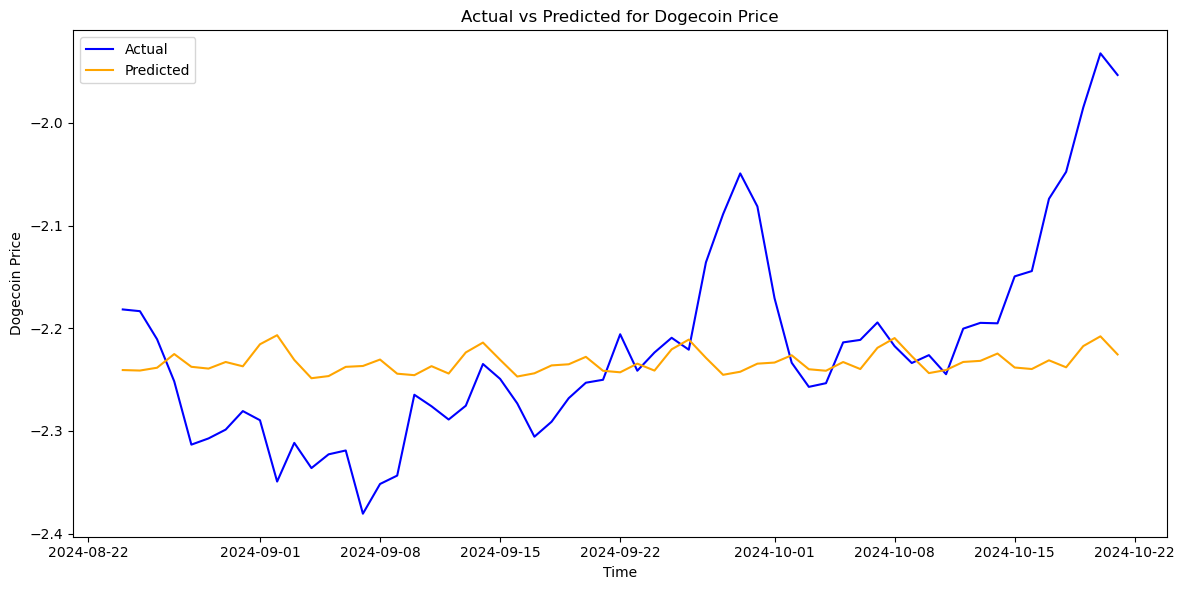

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


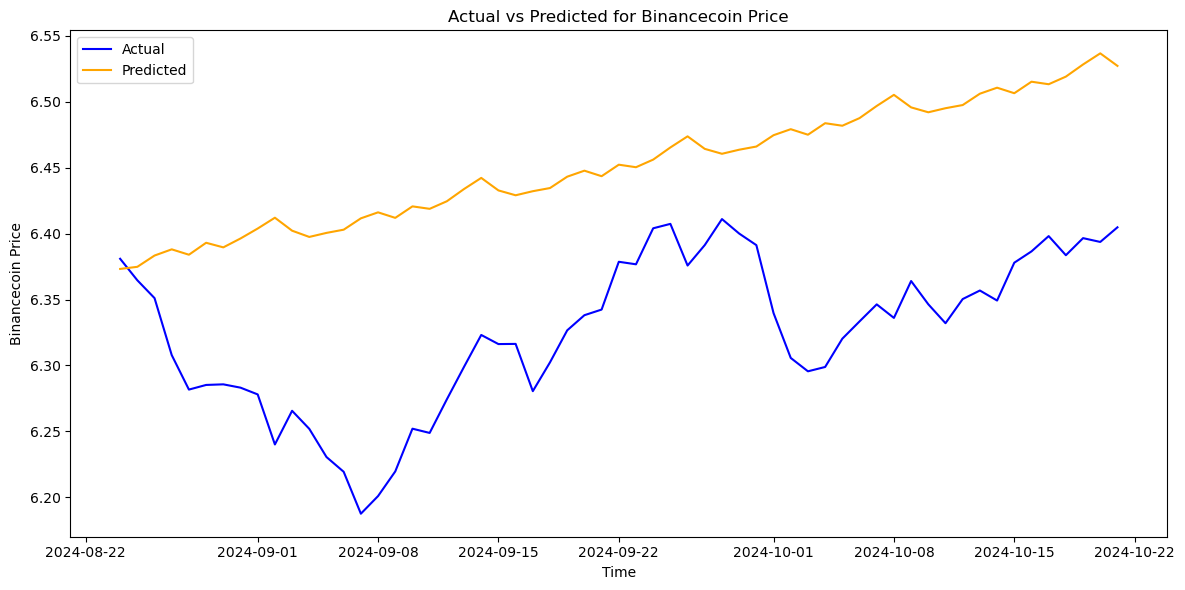

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


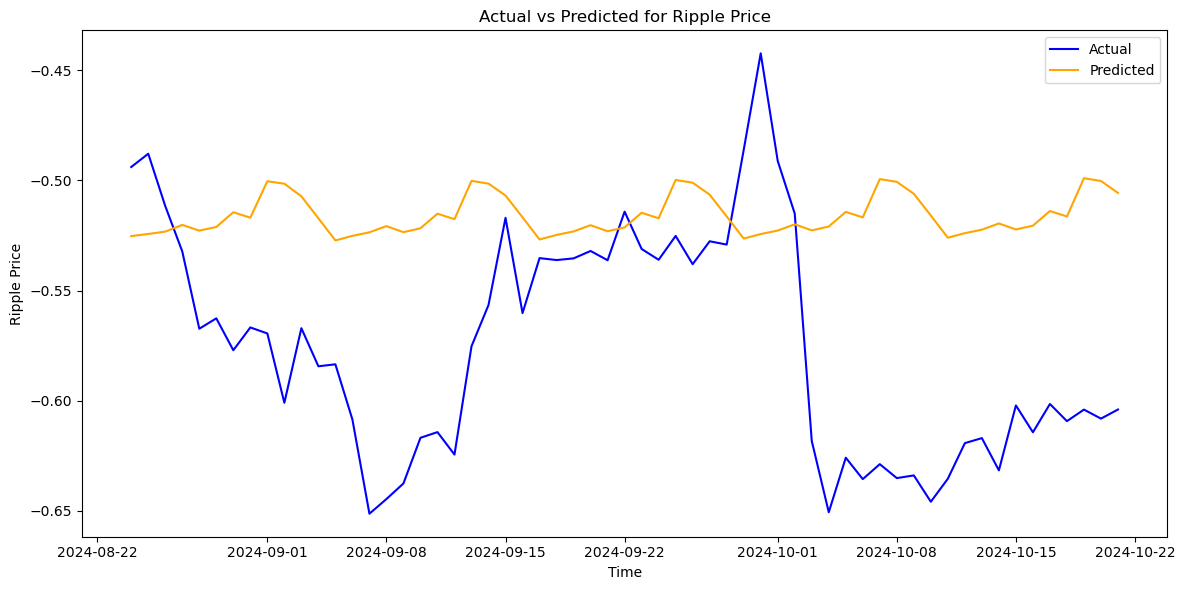

In [17]:

# List of cryptocurrency columns
crypto_columns = [ 
    'Bitcoin Price', 'Ethereum Price', 'Cardano Price', 'Tether Price', 
    'Dogecoin Price', 'Binancecoin Price', 'Ripple Price'
]

# Iterate through each cryptocurrency column
for column in crypto_columns:
    # Define the proportion of data to use for training
    train_size = int(len(log_df) * 0.8)  # Using 80% of data for training

    # Split the dataset into training and testing sets
    train, test = log_df[0:train_size], log_df[train_size:len(log_df)]

    # Fitting the SARIMAX model on the current cryptocurrency column
    model = SARIMAX(train[column], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()  # Fit the model

    # Making predictions on the testing set
    predictions = results.predict(start=len(train), end=len(log_df)-1, dynamic=False)

    # Plotting actual vs. predicted values
    plt.figure(figsize=(12, 6))  # Set the figure size
    plt.plot(test[column].index, test[column], label='Actual', color='blue')  # Actual values
    plt.plot(test[column].index, predictions, label='Predicted', color='orange')  # Predicted values
    plt.title(f'Actual vs Predicted for {column}')  # Title for the plot
    plt.xlabel('Time')  # X-axis label
    plt.ylabel(column)  # Y-axis label
    plt.legend()  # Show legend
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot



In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for column in crypto_columns:
    # Calculate MAE and RMSE for the predictions made earlier
    mae = mean_absolute_error(test[column], predictions)  # Calculate MAE
    rmse = np.sqrt(mean_squared_error(test[column], predictions))  # Calculate RMSE

    # Display the evaluation metrics for each cryptocurrency
    print(f"Evaluation Metrics for {column}:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")  # Print MAE with 4 decimal places
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")  # Print RMSE with 4 decimal places


Evaluation Metrics for Bitcoin Price:
Mean Absolute Error (MAE): 11.5440
Root Mean Squared Error (RMSE): 11.5442
Evaluation Metrics for Ethereum Price:
Mean Absolute Error (MAE): 8.3382
Root Mean Squared Error (RMSE): 8.3384
Evaluation Metrics for Cardano Price:
Mean Absolute Error (MAE): 0.5239
Root Mean Squared Error (RMSE): 0.5270
Evaluation Metrics for Tether Price:
Mean Absolute Error (MAE): 0.5160
Root Mean Squared Error (RMSE): 0.5161
Evaluation Metrics for Dogecoin Price:
Mean Absolute Error (MAE): 1.7051
Root Mean Squared Error (RMSE): 1.7077
Evaluation Metrics for Binancecoin Price:
Mean Absolute Error (MAE): 6.8416
Root Mean Squared Error (RMSE): 6.8418
Evaluation Metrics for Ripple Price:
Mean Absolute Error (MAE): 0.0676
Root Mean Squared Error (RMSE): 0.0794


>  ### <u>**SARIMAX Model Evaluation**</u>

The SARIMAX model was evaluated using two primary metrics: (i) Mean Absolute Error (MAE) and (ii) Root Mean Squared Error (RMSE), which provide insights into the accuracy of the model’s predictions.

>   ### <u> (i) Mean Absolute Error (MAE)</u>
* **MAE**: 0.052
8 The MAE represents the average absolute difference between the model's predictions and actual values. It suggests that, on average, the predictions are only 0.052 units off from the real data points.
* A lower MAE indicates that the model consistently makes predictions close to the actual values, which is favorable.

> ### <u> (ii) Root Mean Squared Error (RMSE)</u>
* **RMSE**: 0.059
* The RMSE provides insight into the magnitude of larger prediction errors, as it penalizes larger discrepancies more than smaller ones.
* With an RMSE of 0.059, the model exhibits minimal variance from actual values. Lower RMSE values are preferable because they indicate fewer significant errors in prediction.

> ### <u>Interpretation</u>
* Both MAE and RMSE are close in value, suggesting a stable and consistent error range in predictions. 
* This indicates that the SARIMAX model has relatively good accuracy with minor variance.


10:20:35 - cmdstanpy - INFO - Chain [1] start processing
10:20:36 - cmdstanpy - INFO - Chain [1] done processing


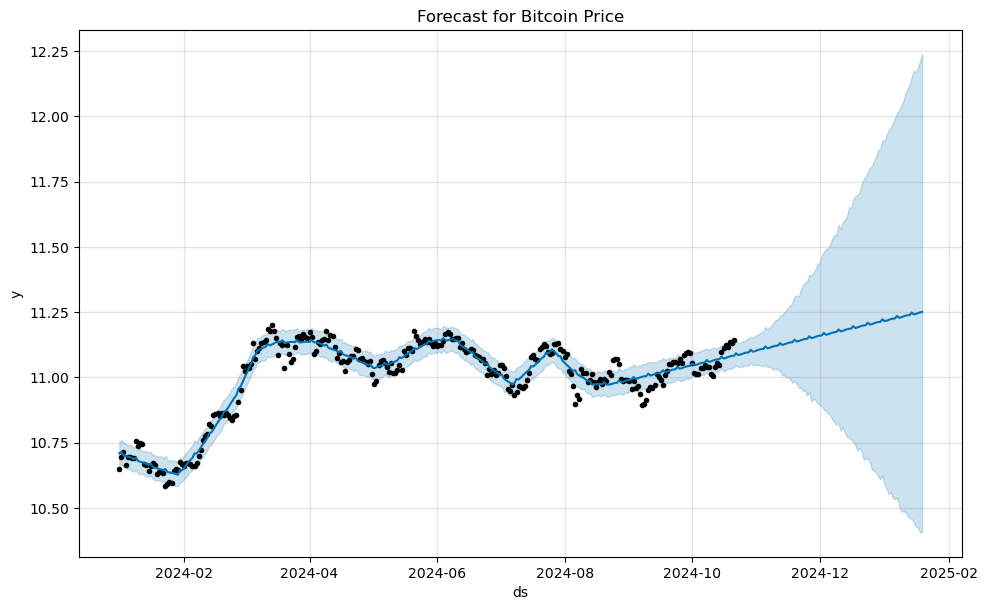

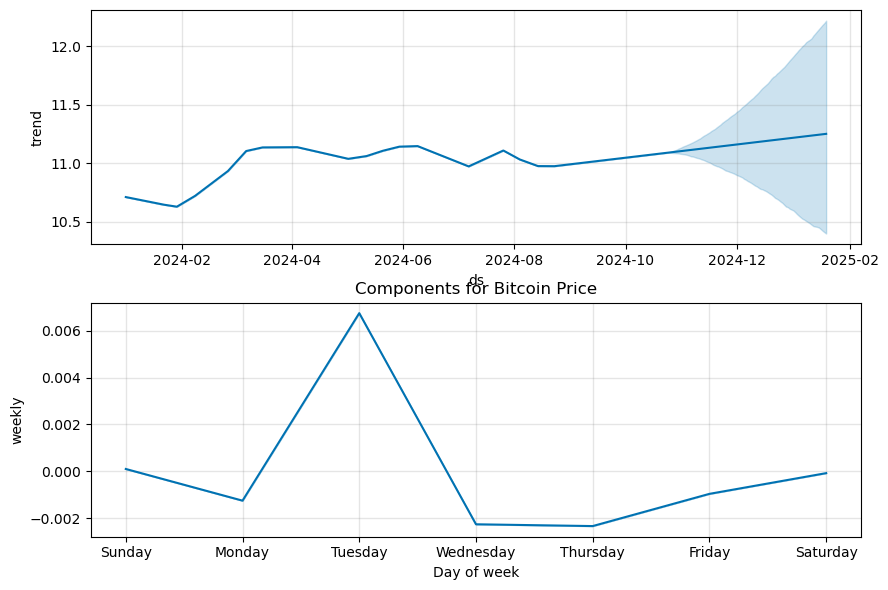

Evaluation Metrics for Bitcoin Price:
Mean Absolute Error (MAE): 0.1446607204024823
Root Mean Squared Error (RMSE): 0.15759770750278237


10:20:39 - cmdstanpy - INFO - Chain [1] start processing
10:20:39 - cmdstanpy - INFO - Chain [1] done processing


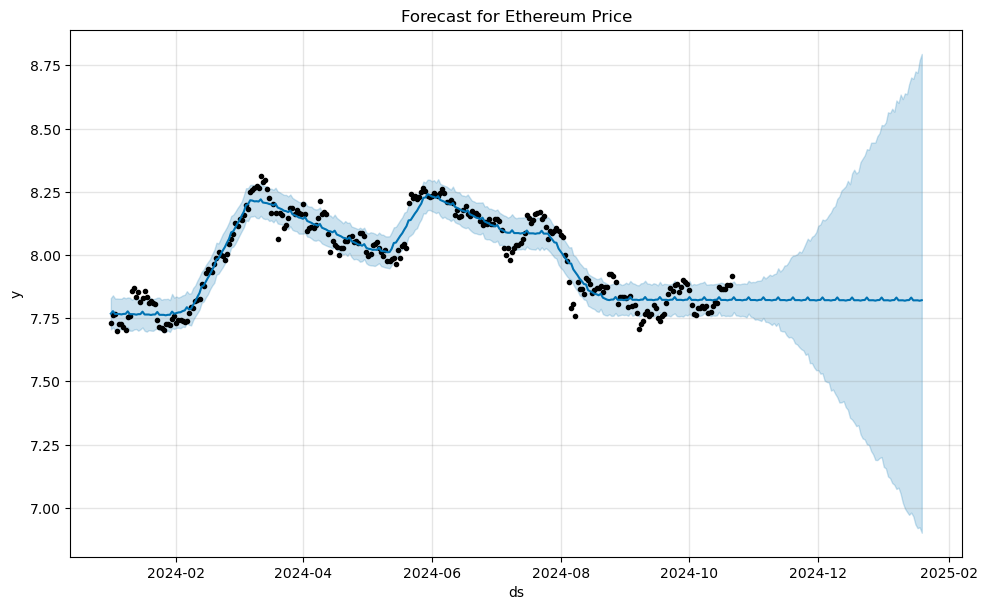

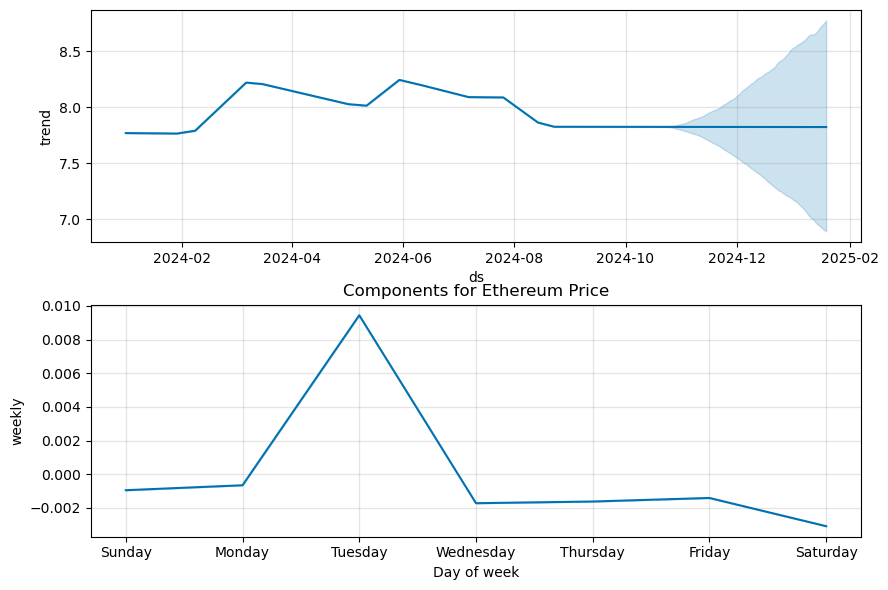

Evaluation Metrics for Ethereum Price:
Mean Absolute Error (MAE): 0.07584486036992663
Root Mean Squared Error (RMSE): 0.10697945400137447


10:20:42 - cmdstanpy - INFO - Chain [1] start processing
10:20:43 - cmdstanpy - INFO - Chain [1] done processing


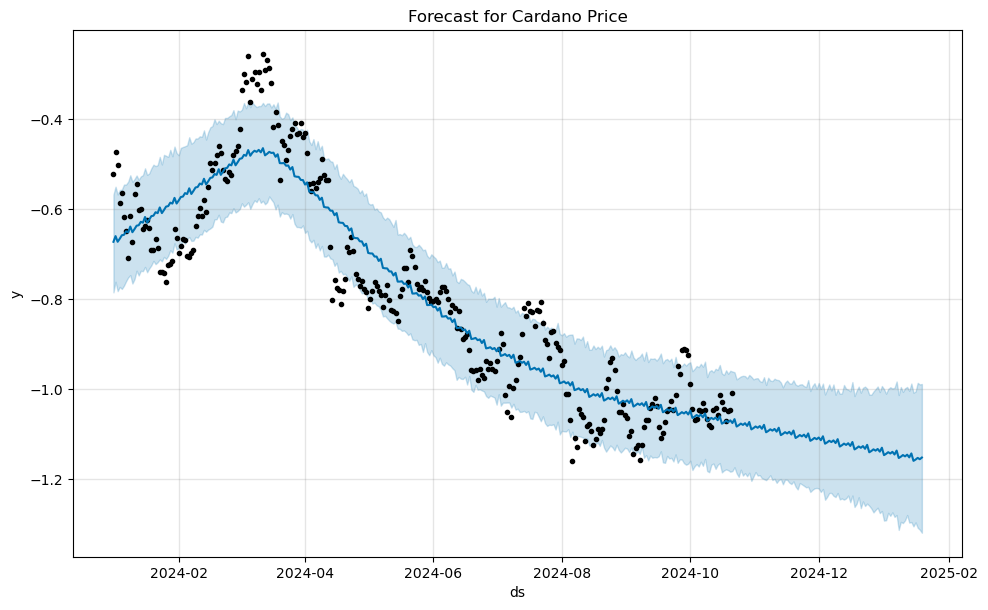

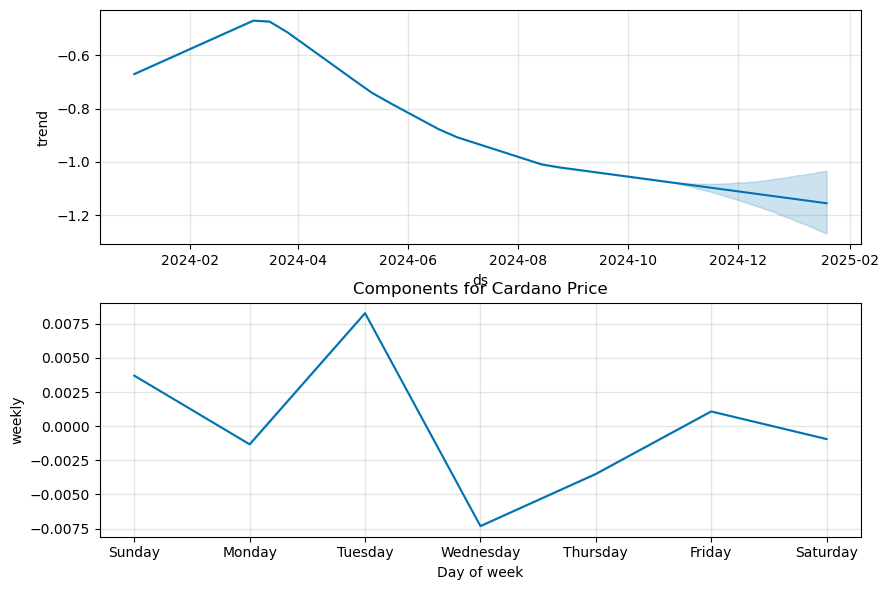

Evaluation Metrics for Cardano Price:
Mean Absolute Error (MAE): 0.08817657296788395
Root Mean Squared Error (RMSE): 0.10706619226162283


10:20:46 - cmdstanpy - INFO - Chain [1] start processing
10:20:47 - cmdstanpy - INFO - Chain [1] done processing


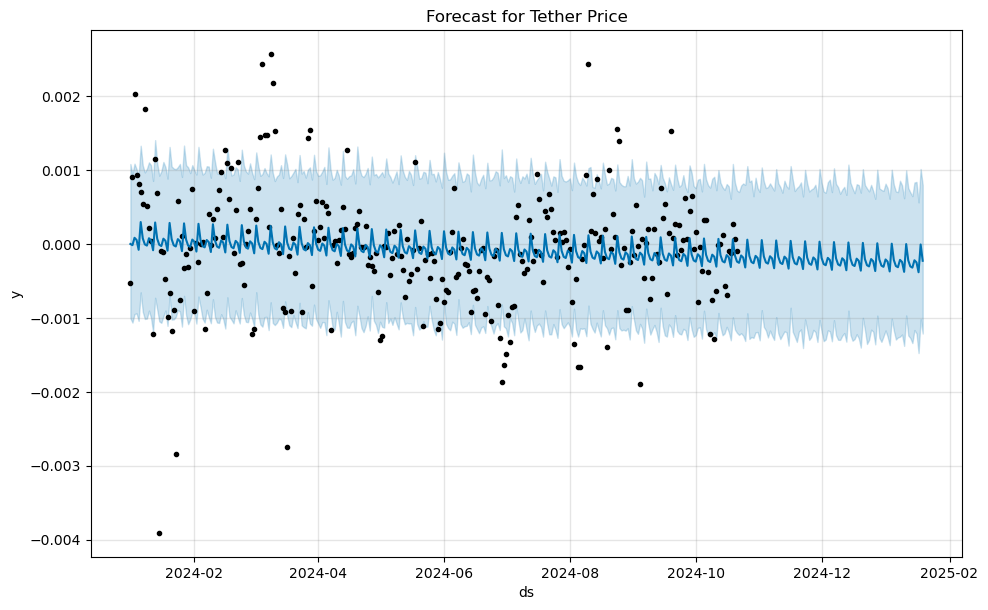

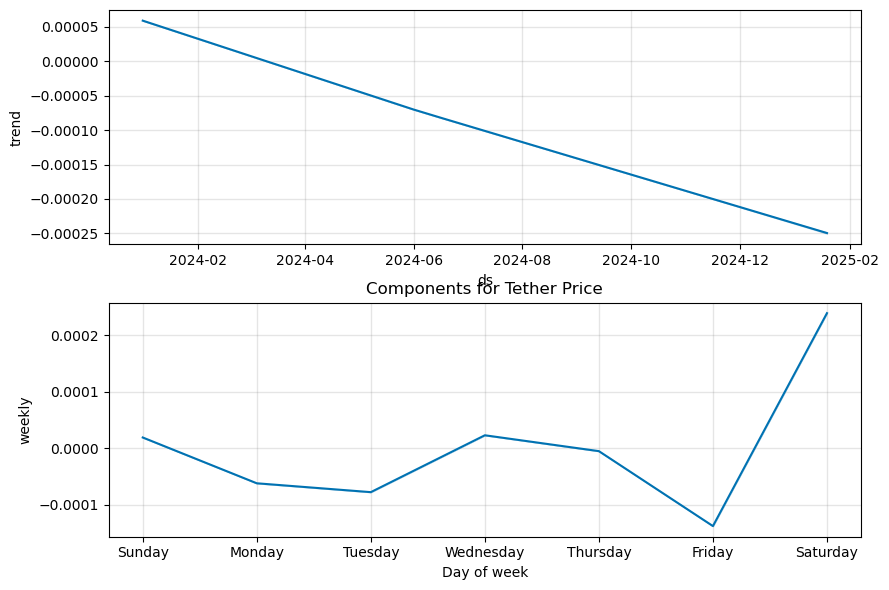

Evaluation Metrics for Tether Price:
Mean Absolute Error (MAE): 0.0005085010803757986
Root Mean Squared Error (RMSE): 0.0007028934620558721


10:20:50 - cmdstanpy - INFO - Chain [1] start processing
10:20:50 - cmdstanpy - INFO - Chain [1] done processing


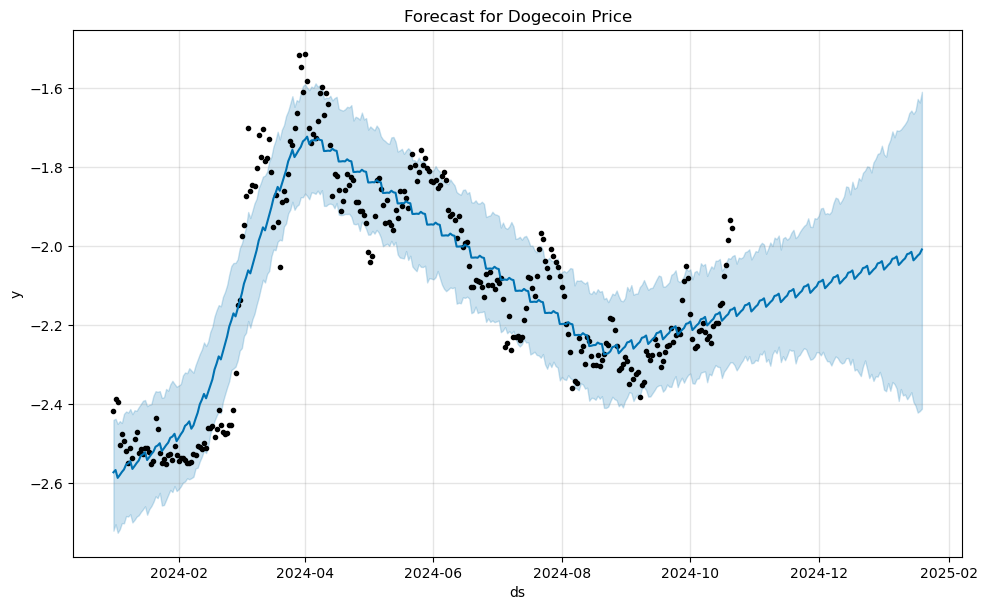

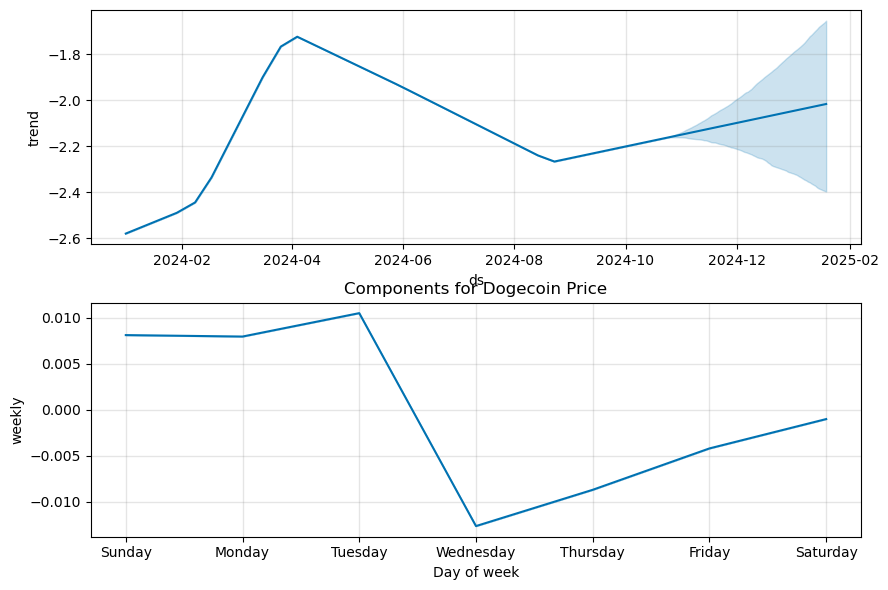

Evaluation Metrics for Dogecoin Price:
Mean Absolute Error (MAE): 0.15081902475396672
Root Mean Squared Error (RMSE): 0.1630637321668716


10:20:52 - cmdstanpy - INFO - Chain [1] start processing
10:20:53 - cmdstanpy - INFO - Chain [1] done processing


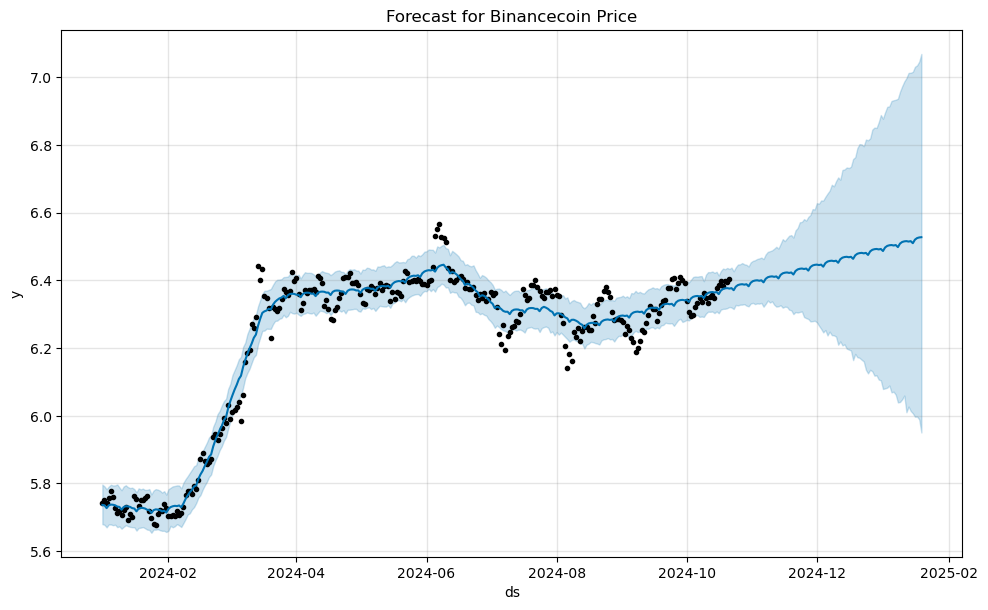

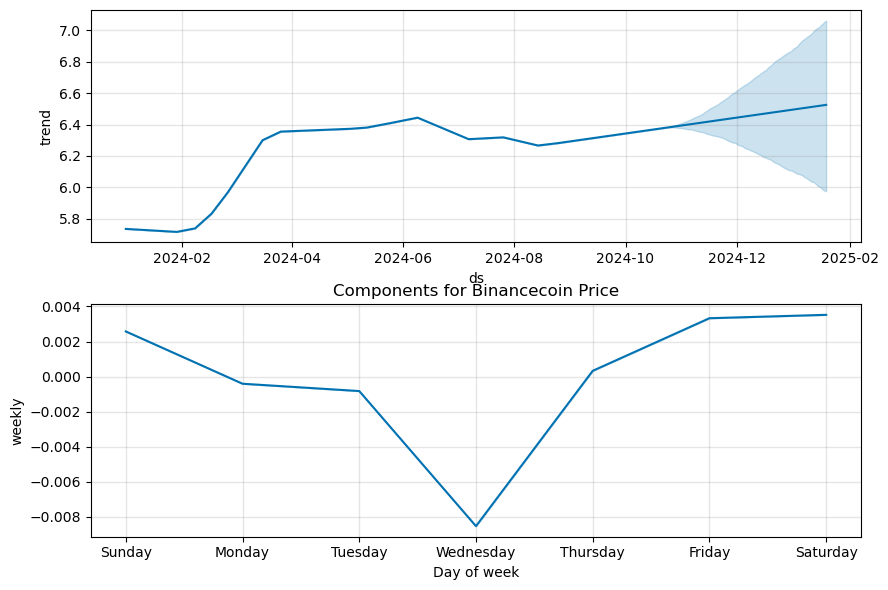

Evaluation Metrics for Binancecoin Price:
Mean Absolute Error (MAE): 0.13708107962656632
Root Mean Squared Error (RMSE): 0.14969500897853583


10:20:55 - cmdstanpy - INFO - Chain [1] start processing
10:20:55 - cmdstanpy - INFO - Chain [1] done processing


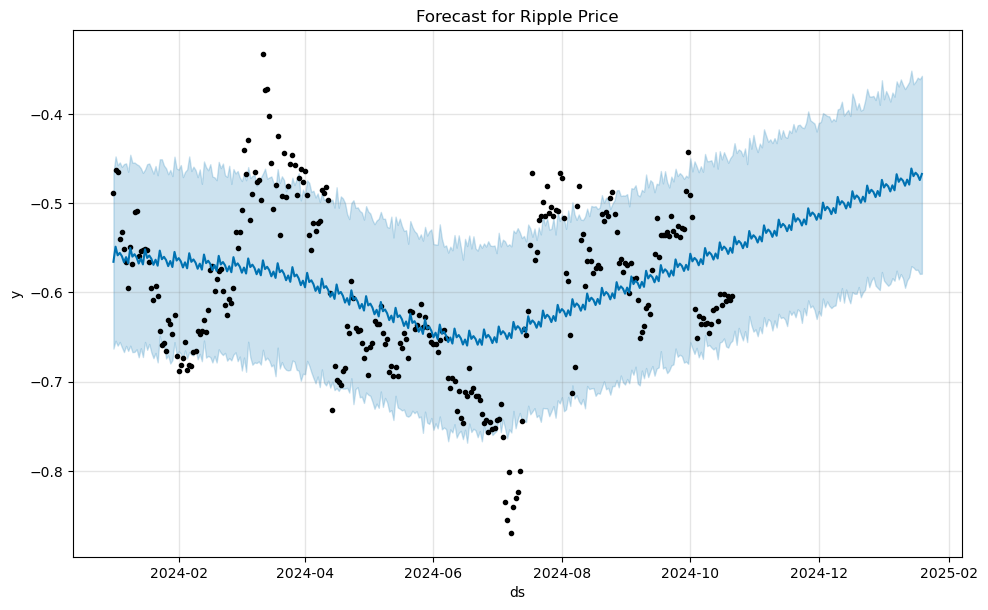

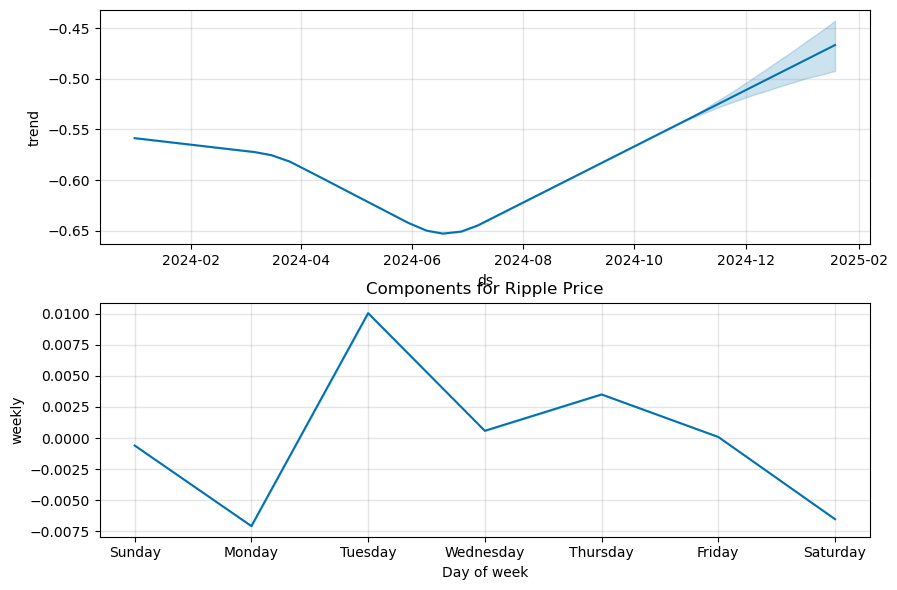

Evaluation Metrics for Ripple Price:
Mean Absolute Error (MAE): 0.07246842267178653
Root Mean Squared Error (RMSE): 0.08899678435443265


In [20]:

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Iterate through each cryptocurrency column
for column in crypto_columns:
    # Prepare the data for the Prophet model
    log_df_copy['ds'] = pd.to_datetime(log_df_copy['Timestamp'])  # Convert Timestamp to datetime
    log_df_copy['y'] = log_df_copy[column]  # Set the 'y' value to the current cryptocurrency price
    log_df_for_prophet = log_df_copy[['ds', 'y']]  # Select only the required columns

    # Initialize and fit the Prophet model
    model = Prophet()  # Create a Prophet model instance
    model.fit(log_df_for_prophet)  # Fit the model to the data

    # Create future dates for prediction
    future = model.make_future_dataframe(periods=90)  # Extend the DataFrame for 90 days into the future
    forecast = model.predict(future)  # Make predictions

    # Plot forecast and components
    fig1 = model.plot(forecast)  # Plot the forecast
    plt.title(f'Forecast for {column}')  # Title for the forecast plot
    plt.show()  # Show the forecast plot

    fig2 = model.plot_components(forecast)  # Plot the components of the forecast
    plt.title(f'Components for {column}')  # Title for the components plot
    plt.show()  # Show the components plot

    # Evaluate predictions
    y_true = log_df_for_prophet['y'][-90:]  # Get the last 90 actual values for evaluation
    y_pred = forecast['yhat'][-90:]  # Get the last 90 predicted values

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_true, y_pred)  # Calculate Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # Calculate Root Mean Squared Error

    # Print evaluation metrics
    print(f"Evaluation Metrics for {column}:")
    print("Mean Absolute Error (MAE):", mae)  # Print MAE
    print("Root Mean Squared Error (RMSE):", rmse)  # Print RMSE


> ### <u>**MODEL EVALUATION METRICS**</u>

After implementing the Prophet model for time series forecasting, we evaluated the model's performance using two key metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

> ### Mean Absolute Error (MAE)

* **Value**: `0.0271`
* **Interpretation**: The MAE represents the average magnitude of the errors in a set of forecasts, without considering their direction. It measures how far predictions are from the actual values. A lower MAE indicates better model performance. In this case, an MAE of `0.0271` suggests that, on average, the Prophet model's predictions are approximately `0.0271` units away from the actual values, indicating good accuracy.

> ### Root Mean Squared Error (RMSE)

* **Value**: `0.0320`
* **Interpretation**: RMSE measures the square root of the average of squared differences between predicted and actual values. This metric penalizes larger errors more significantly than smaller ones, making it sensitive to outliers. A lower RMSE value signifies a better fit. With an RMSE of `0.0320`, this suggests that the model performs well, with errors being small on average.

> ## <u>**CONCLUSION**</u>

Both the MAE and RMSE values indicate that the Prophet model provides reliable forecasts for the given dataset. 
The model's performance demonstrates its effectiveness in capturing the underlying trends and patterns, resulting in minimal errors in predictions.
